In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set_style(style = 'darkgrid')

plt.rcParams['figure.figsize'] = [12.0, 10.0]

In [2]:
# Loading the dataset

df = pd.read_csv("Combined Ticket data final.csv")
df

Number Category     Type     Item Product           Created On  \
0        P01302492    Cat28  Type365  Item202   Prod8  2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8  2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4  2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                  ...   
2096903  P53389955    Cat53   Type49  Item416  Prod10  2022-06-08 22:21:42   
2096904  P53389956    Cat60  Type247  Item248  Prod12  2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12  2022-06-08 23:14:19   
2096906  P53389976    Cat59  Type125  Item248  Prod11  2022-06-08 23:29:06   
2096907  P53389981    Cat53   Type46  Item339  Prod10  2022-06-08 23:43:57   

        Created Date Created MMM-YY Created By Created by Category  ...  \
0         08-31-2018        08-2018    CB 5917           UserType1  ...   
1         08-31-2018        08-2018    CB 5917           UserType1  ...   
2         08-31-2018        08-2018    CB 5917           UserType1  ...   
3         08-31-2018        08-2018    CB 5917           UserType1  ...   
4         08-31-2018        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096903   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096904   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096905   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096906   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096907   06-08-2022        06-2022    CB 1475           UserType1  ...   

          Age Group               Closed Closed By Company   CI Name CI Type  \
0        0 - 1 Days  2018-09-04 03:02:26    CB 193    I 22  CI 14040  router   
1         5-15 Days  2018-09-09 03:00:14     CB 73    I 22  CI 50864  router   
2         5-15 Days  2018-09-09 03:00:58     CB 73    I 22  CI 37301  router   
3          2-5 Days  2018-09-05 03:00:57   CB 2236    I 22  CI 29314  router   
4        0 - 1 Days  2018-09-04 11:06:22    CB 917    I 20  Blank CI     NaN   
...             ...                  ...       ...     ...       ...     ...   
2096903  0 - 1 Days                  NaN  CB Blank   C 715  CI 34769  server   
2096904  0 - 1 Days  2022-06-08 22:48:38   CB 2970    C 14  CI 42592  server   
2096905  0 - 1 Days  2022-06-08 23:59:09   CB 2970   C 232   CI 1689     NaN   
2096906  0 - 1 Days                  NaN  CB Blank    C 44  CI 30232     ids   
2096907  0 - 1 Days                  NaN  CB Blank   C 990    CI 410     box   

         CI Device Status  CI Managed Status Internal/External  \
0                 Removed      Fully Managed          Internal   
1                 Removed      Fully Managed          Internal   
2                 Removed      Fully Managed          Internal   
3        Installed-Active      Fully Managed          Internal   
4                     NaN                NaN          Internal   
...                   ...                ...               ...   
2096903  Installed-Active            Managed          Customer   
2096904  Installed-Active            Managed          Customer   
2096905  Installed-Active            Managed          Customer   
2096906  Installed-Active            Managed          Customer   
2096907  Installed-Active            Company          Customer   

        Reassignment Count  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1  
...                    ...  
2096903                  0  
2096904                  0  
2096905                  0  
2096906                  0  
2096907                  0  

[2096908 rows x 41 columns]

In [3]:
df.shape

(2096908, 41)

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.columns = df.columns.str.replace("-","_").str.lower()
df.columns

Index(['number', 'category', 'type', 'item', 'product', 'created_on',
       'created_date', 'created_mmm_yy', 'created_by', 'created_by_category',
       'time_to_assign', 'time_to_assign_(hours)', 'tta_otp', 'assigned_to',
       'assignment_group', 'resolved_at', 'time_to_resolve',
       'time_to_resolved_(hours)', 'ttr_otp', 'resolved_by',
       'time_to_service_restore', 'service_restore_end',
       'service_restore_duration_(hours)', 'service_restore_date',
       'service_restored_monthyear', 'root_cause_l1', 'root_cause_l2',
       'root_cause_l3', 'state', 'status', 'age_days', 'age_group', 'closed',
       'closed_by', 'company', 'ci_name', 'ci_type', 'ci_device_status',
       'ci_managed_status', 'internal/external', 'reassignment_count'],
      dtype='object')

In [5]:
df.head()

number category     type     item product           created_on  \
0  P01302492    Cat28  Type365  Item202   Prod8  2018-08-31 01:06:16   
1  P01302702    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:07   
2  P01302701    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:04   
3  P01302531    Cat28  Type365  Item202   Prod8  2018-08-31 01:42:38   
4  P01303164    Cat19   Type77  Item119   Prod4  2018-08-31 09:30:57   

  created_date created_mmm_yy created_by created_by_category  ...   age_group  \
0   08-31-2018        08-2018    CB 5917           UserType1  ...  0 - 1 Days   
1   08-31-2018        08-2018    CB 5917           UserType1  ...   5-15 Days   
2   08-31-2018        08-2018    CB 5917           UserType1  ...   5-15 Days   
3   08-31-2018        08-2018    CB 5917           UserType1  ...    2-5 Days   
4   08-31-2018        08-2018     CB 175           UserType2  ...  0 - 1 Days   

                closed closed_by company   ci_name ci_type  ci_device_status  \
0  2018-09-04 03:02:26    CB 193    I 22  CI 14040  router           Removed   
1  2018-09-09 03:00:14     CB 73    I 22  CI 50864  router           Removed   
2  2018-09-09 03:00:58     CB 73    I 22  CI 37301  router           Removed   
3  2018-09-05 03:00:57   CB 2236    I 22  CI 29314  router  Installed-Active   
4  2018-09-04 11:06:22    CB 917    I 20  Blank CI     NaN               NaN   

   ci_managed_status internal/external reassignment_count  
0      Fully Managed          Internal                  1  
1      Fully Managed          Internal                  1  
2      Fully Managed          Internal                  1  
3      Fully Managed          Internal                  1  
4                NaN          Internal                  1  

[5 rows x 41 columns]

### Checking for Null Values

In [6]:
df.isnull().sum()/df.shape[0]

number                              0.000000
category                            0.000000
type                                0.001689
item                                0.001696
product                             0.001931
created_on                          0.000000
created_date                        0.000000
created_mmm_yy                      0.000000
created_by                          0.000000
created_by_category                 0.000000
time_to_assign                      0.157799
time_to_assign_(hours)              0.157799
tta_otp                             0.326288
assigned_to                         0.000000
assignment_group                    0.005586
resolved_at                         0.019906
time_to_resolve                     0.020683
time_to_resolved_(hours)            0.000000
ttr_otp                             0.270206
resolved_by                         0.000000
time_to_service_restore             0.020683
service_restore_end                 0.020683
service_re

#### Checking Ticket count per month

In [7]:
df_created_mmm_yy = df.groupby(['created_mmm_yy']).agg({'number':'count'}).reset_index()
df_created_mmm_yy

created_mmm_yy  number
0         01-2016   18038
1         01-2017   23568
2         01-2018   21305
3         01-2019   43379
4         01-2020   34636
..            ...     ...
73        12-2017   21241
74        12-2018   54048
75        12-2019   33617
76        12-2020   21193
77        12-2021   14435

[78 rows x 2 columns]

In [8]:
fig = px.bar(df_created_mmm_yy, x='created_mmm_yy', y='number', color='created_mmm_yy', height=400, width = 3000, title = 'Ticket Distribution',labels={
                     "created_mmm_yy": "Month-Year",
                     "number": "Ticket Count",
                     "created_mmm_yy": "Month-Year"
                 })
fig.show()

#### Extrating the year part from created_date column

In [9]:
df['created_year'] = pd.DatetimeIndex(df['created_date']).year
df

number category     type     item product           created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8  2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8  2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4  2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                  ...   
2096903  P53389955    Cat53   Type49  Item416  Prod10  2022-06-08 22:21:42   
2096904  P53389956    Cat60  Type247  Item248  Prod12  2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12  2022-06-08 23:14:19   
2096906  P53389976    Cat59  Type125  Item248  Prod11  2022-06-08 23:29:06   
2096907  P53389981    Cat53   Type46  Item339  Prod10  2022-06-08 23:43:57   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         08-31-2018        08-2018    CB 5917           UserType1  ...   
1         08-31-2018        08-2018    CB 5917           UserType1  ...   
2         08-31-2018        08-2018    CB 5917           UserType1  ...   
3         08-31-2018        08-2018    CB 5917           UserType1  ...   
4         08-31-2018        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096903   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096904   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096905   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096906   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096907   06-08-2022        06-2022    CB 1475           UserType1  ...   

                      closed  closed_by company   ci_name ci_type  \
0        2018-09-04 03:02:26     CB 193    I 22  CI 14040  router   
1        2018-09-09 03:00:14      CB 73    I 22  CI 50864  router   
2        2018-09-09 03:00:58      CB 73    I 22  CI 37301  router   
3        2018-09-05 03:00:57    CB 2236    I 22  CI 29314  router   
4        2018-09-04 11:06:22     CB 917    I 20  Blank CI     NaN   
...                      ...        ...     ...       ...     ...   
2096903                  NaN   CB Blank   C 715  CI 34769  server   
2096904  2022-06-08 22:48:38    CB 2970    C 14  CI 42592  server   
2096905  2022-06-08 23:59:09    CB 2970   C 232   CI 1689     NaN   
2096906                  NaN   CB Blank    C 44  CI 30232     ids   
2096907                  NaN   CB Blank   C 990    CI 410     box   

         ci_device_status ci_managed_status  internal/external  \
0                 Removed     Fully Managed           Internal   
1                 Removed     Fully Managed           Internal   
2                 Removed     Fully Managed           Internal   
3        Installed-Active     Fully Managed           Internal   
4                     NaN               NaN           Internal   
...                   ...               ...                ...   
2096903  Installed-Active           Managed           Customer   
2096904  Installed-Active           Managed           Customer   
2096905  Installed-Active           Managed           Customer   
2096906  Installed-Active           Managed           Customer   
2096907  Installed-Active           Company           Customer   

        reassignment_count created_year  
0                        1         2018  
1                        1         2018  
2                        1         2018  
3                        1         2018  
4                        1         2018  
...                    ...          ...  
2096903                  0         2022  
2096904                  0         2022  
2096905                  0         2022  
2096906                  0         2022  
2096907                  0         2022  

[2096908 rows x 42 columns]

In [10]:
df_created_year = df.groupby(['created_year']).agg({'number':'count'}).reset_index()
fig = px.bar(df_created_year, x='created_year', y='number', color='created_year', height=500, width = 500, title = 'Ticket Distribution over the years',labels={
                     "created_year": "Year",
                     "number": "Ticket Count",
                     "created_year": "Year"
                 })
fig.show()

#### Creating a new column for Priority

In [13]:
df['priority'] = df['number'].str[:2]
df['priority']

0          P0
1          P0
2          P0
3          P0
4          P0
           ..
2096903    P5
2096904    P5
2096905    P5
2096906    P5
2096907    P5
Name: priority, Length: 2096908, dtype: object

In [14]:
df_prod = df.groupby(['priority']).agg({'product':'count'}).reset_index()
df_prod

priority  product
0       P0     2263
1       P1     6295
2       P2   392499
3       P3   715457
4       P4   444928
5       P5   531416

### Plotting based on Priority

In [15]:
fig_3 = px.bar(df_prod, x='priority', y='product', color='priority', height=800, width = 800)
fig_3.show()

In [19]:
# Making a copy of original dataframe

In [16]:
df_copy = df.copy()
df_copy

number category     type     item product           created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8  2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8  2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8  2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4  2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                  ...   
2096903  P53389955    Cat53   Type49  Item416  Prod10  2022-06-08 22:21:42   
2096904  P53389956    Cat60  Type247  Item248  Prod12  2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12  2022-06-08 23:14:19   
2096906  P53389976    Cat59  Type125  Item248  Prod11  2022-06-08 23:29:06   
2096907  P53389981    Cat53   Type46  Item339  Prod10  2022-06-08 23:43:57   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         08-31-2018        08-2018    CB 5917           UserType1  ...   
1         08-31-2018        08-2018    CB 5917           UserType1  ...   
2         08-31-2018        08-2018    CB 5917           UserType1  ...   
3         08-31-2018        08-2018    CB 5917           UserType1  ...   
4         08-31-2018        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096903   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096904   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096905   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096906   06-08-2022        06-2022    CB 1475           UserType1  ...   
2096907   06-08-2022        06-2022    CB 1475           UserType1  ...   

        closed_by  company   ci_name ci_type  ci_device_status  \
0          CB 193     I 22  CI 14040  router           Removed   
1           CB 73     I 22  CI 50864  router           Removed   
2           CB 73     I 22  CI 37301  router           Removed   
3         CB 2236     I 22  CI 29314  router  Installed-Active   
4          CB 917     I 20  Blank CI     NaN               NaN   
...           ...      ...       ...     ...               ...   
2096903  CB Blank    C 715  CI 34769  server  Installed-Active   
2096904   CB 2970     C 14  CI 42592  server  Installed-Active   
2096905   CB 2970    C 232   CI 1689     NaN  Installed-Active   
2096906  CB Blank     C 44  CI 30232     ids  Installed-Active   
2096907  CB Blank    C 990    CI 410     box  Installed-Active   

        ci_managed_status internal/external  reassignment_count created_year  \
0           Fully Managed          Internal                   1         2018   
1           Fully Managed          Internal                   1         2018   
2           Fully Managed          Internal                   1         2018   
3           Fully Managed          Internal                   1         2018   
4                     NaN          Internal                   1         2018   
...                   ...               ...                 ...          ...   
2096903           Managed          Customer                   0         2022   
2096904           Managed          Customer                   0         2022   
2096905           Managed          Customer                   0         2022   
2096906           Managed          Customer                   0         2022   
2096907           Company          Customer                   0         2022   

        priority  
0             P0  
1             P0  
2             P0  
3             P0  
4             P0  
...          ...  
2096903       P5  
2096904       P5  
2096905       P5  
2096906       P5  
2096907       P5  

[2096908 rows x 43 columns]

In [21]:
df_copy.dtypes

number                               object
category                             object
type                                 object
item                                 object
product                              object
created_on                           object
created_date                         object
created_mmm_yy                       object
created_by                           object
created_by_category                  object
time_to_assign                       object
time_to_assign_(hours)              float64
tta_otp                              object
assigned_to                          object
assignment_group                     object
resolved_at                          object
time_to_resolve                      object
time_to_resolved_(hours)            float64
ttr_otp                              object
resolved_by                          object
time_to_service_restore              object
service_restore_end                  object
service_restore_duration_(hours)

##### Considering only closed tickets in the dataframe. 

In [17]:
df_copy = df_copy[df_copy['closed'].isnull() == False]

In [18]:
df_copy[['created_on','created_date','resolved_at','service_restore_date','closed']] = df_copy[['created_on','created_date','resolved_at','service_restore_date','closed']].apply(pd.to_datetime)

In [19]:
pd.to_datetime(df_copy['created_mmm_yy'], format='%m-%Y')
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        closed_by  company   ci_name ci_type  ci_device_status  \
0          CB 193     I 22  CI 14040  router           Removed   
1           CB 73     I 22  CI 50864  router           Removed   
2           CB 73     I 22  CI 37301  router           Removed   
3         CB 2236     I 22  CI 29314  router  Installed-Active   
4          CB 917     I 20  Blank CI     NaN               NaN   
...           ...      ...       ...     ...               ...   
2096886   CB 2970     C 14  CI 18220  server  Installed-Active   
2096887   CB 2970    C 351  CI 47618  server  Installed-Active   
2096895   CB 2970     C 14  CI 18220  server  Installed-Active   
2096904   CB 2970     C 14  CI 42592  server  Installed-Active   
2096905   CB 2970    C 232   CI 1689     NaN  Installed-Active   

        ci_managed_status internal/external  reassignment_count created_year  \
0           Fully Managed          Internal                   1         2018   
1           Fully Managed          Internal                   1         2018   
2           Fully Managed          Internal                   1         2018   
3           Fully Managed          Internal                   1         2018   
4                     NaN          Internal                   1         2018   
...                   ...               ...                 ...          ...   
2096886           Managed          Customer                   0         2022   
2096887           Managed          Customer                   0         2022   
2096895           Managed          Customer                   0         2022   
2096904           Managed          Customer                   0         2022   
2096905           Managed          Customer                   0         2022   

        priority  
0             P0  
1             P0  
2             P0  
3             P0  
4             P0  
...          ...  
2096886       P5  
2096887       P5  
2096895       P5  
2096904       P5  
2096905       P5  

[2060092 rows x 43 columns]

In [20]:
df_copy['service_restore_date'] = df_copy['service_restore_date'].dt.strftime('%Y-%m-%d')
df_copy['closed'] = df_copy['closed'].dt.strftime('%Y-%m-%d')
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        closed_by  company   ci_name ci_type  ci_device_status  \
0          CB 193     I 22  CI 14040  router           Removed   
1           CB 73     I 22  CI 50864  router           Removed   
2           CB 73     I 22  CI 37301  router           Removed   
3         CB 2236     I 22  CI 29314  router  Installed-Active   
4          CB 917     I 20  Blank CI     NaN               NaN   
...           ...      ...       ...     ...               ...   
2096886   CB 2970     C 14  CI 18220  server  Installed-Active   
2096887   CB 2970    C 351  CI 47618  server  Installed-Active   
2096895   CB 2970     C 14  CI 18220  server  Installed-Active   
2096904   CB 2970     C 14  CI 42592  server  Installed-Active   
2096905   CB 2970    C 232   CI 1689     NaN  Installed-Active   

        ci_managed_status internal/external  reassignment_count created_year  \
0           Fully Managed          Internal                   1         2018   
1           Fully Managed          Internal                   1         2018   
2           Fully Managed          Internal                   1         2018   
3           Fully Managed          Internal                   1         2018   
4                     NaN          Internal                   1         2018   
...                   ...               ...                 ...          ...   
2096886           Managed          Customer                   0         2022   
2096887           Managed          Customer                   0         2022   
2096895           Managed          Customer                   0         2022   
2096904           Managed          Customer                   0         2022   
2096905           Managed          Customer                   0         2022   

        priority  
0             P0  
1             P0  
2             P0  
3             P0  
4             P0  
...          ...  
2096886       P5  
2096887       P5  
2096895       P5  
2096904       P5  
2096905       P5  

[2060092 rows x 43 columns]

In [21]:
df_copy.dtypes

number                                      object
category                                    object
type                                        object
item                                        object
product                                     object
created_on                          datetime64[ns]
created_date                        datetime64[ns]
created_mmm_yy                              object
created_by                                  object
created_by_category                         object
time_to_assign                              object
time_to_assign_(hours)                     float64
tta_otp                                     object
assigned_to                                 object
assignment_group                            object
resolved_at                         datetime64[ns]
time_to_resolve                             object
time_to_resolved_(hours)                   float64
ttr_otp                                     object
resolved_by                    

### Adding Shift Information

In [22]:
df_copy['created_at_hour'] = pd.DatetimeIndex(df_copy['created_on']).hour
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        company   ci_name ci_type  ci_device_status ci_managed_status  \
0          I 22  CI 14040  router           Removed     Fully Managed   
1          I 22  CI 50864  router           Removed     Fully Managed   
2          I 22  CI 37301  router           Removed     Fully Managed   
3          I 22  CI 29314  router  Installed-Active     Fully Managed   
4          I 20  Blank CI     NaN               NaN               NaN   
...         ...       ...     ...               ...               ...   
2096886    C 14  CI 18220  server  Installed-Active           Managed   
2096887   C 351  CI 47618  server  Installed-Active           Managed   
2096895    C 14  CI 18220  server  Installed-Active           Managed   
2096904    C 14  CI 42592  server  Installed-Active           Managed   
2096905   C 232   CI 1689     NaN  Installed-Active           Managed   

        internal/external reassignment_count  created_year priority  \
0                Internal                  1          2018       P0   
1                Internal                  1          2018       P0   
2                Internal                  1          2018       P0   
3                Internal                  1          2018       P0   
4                Internal                  1          2018       P0   
...                   ...                ...           ...      ...   
2096886          Customer                  0          2022       P5   
2096887          Customer                  0          2022       P5   
2096895          Customer                  0          2022       P5   
2096904          Customer                  0          2022       P5   
2096905          Customer                  0          2022       P5   

        created_at_hour  
0                     1  
1                     3  
2                     3  
3                     1  
4                     9  
...                 ...  
2096886              19  
2096887              19  
2096895              21  
2096904              22  
2096905              23  

[2060092 rows x 44 columns]

In [23]:
df_copy.loc[(df_copy['created_at_hour'] >= 0) & (df_copy['created_at_hour'] < 8), 'shift'] = 'S1'
df_copy.loc[(df_copy['created_at_hour'] >= 8) & (df_copy['created_at_hour'] < 16), 'shift'] = 'S2'
df_copy.loc[(df_copy['created_at_hour'] >= 16) & (df_copy['created_at_hour'] < 24), 'shift'] = 'S3'
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

          ci_name  ci_type  ci_device_status ci_managed_status  \
0        CI 14040   router           Removed     Fully Managed   
1        CI 50864   router           Removed     Fully Managed   
2        CI 37301   router           Removed     Fully Managed   
3        CI 29314   router  Installed-Active     Fully Managed   
4        Blank CI      NaN               NaN               NaN   
...           ...      ...               ...               ...   
2096886  CI 18220   server  Installed-Active           Managed   
2096887  CI 47618   server  Installed-Active           Managed   
2096895  CI 18220   server  Installed-Active           Managed   
2096904  CI 42592   server  Installed-Active           Managed   
2096905   CI 1689      NaN  Installed-Active           Managed   

        internal/external reassignment_count created_year  priority  \
0                Internal                  1         2018        P0   
1                Internal                  1         2018        P0   
2                Internal                  1         2018        P0   
3                Internal                  1         2018        P0   
4                Internal                  1         2018        P0   
...                   ...                ...          ...       ...   
2096886          Customer                  0         2022        P5   
2096887          Customer                  0         2022        P5   
2096895          Customer                  0         2022        P5   
2096904          Customer                  0         2022        P5   
2096905          Customer                  0         2022        P5   

        created_at_hour shift  
0                     1    S1  
1                     3    S1  
2                     3    S1  
3                     1    S1  
4                     9    S2  
...                 ...   ...  
2096886              19    S3  
2096887              19    S3  
2096895              21    S3  
2096904              22    S3  
2096905              23    S3  

[2060092 rows x 45 columns]

### Adding Quarter Information

In [24]:
df_copy['created_month'] = pd.DatetimeIndex(df_copy['created_date']).month
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        ci_type  ci_device_status ci_managed_status internal/external  \
0        router           Removed     Fully Managed          Internal   
1        router           Removed     Fully Managed          Internal   
2        router           Removed     Fully Managed          Internal   
3        router  Installed-Active     Fully Managed          Internal   
4           NaN               NaN               NaN          Internal   
...         ...               ...               ...               ...   
2096886  server  Installed-Active           Managed          Customer   
2096887  server  Installed-Active           Managed          Customer   
2096895  server  Installed-Active           Managed          Customer   
2096904  server  Installed-Active           Managed          Customer   
2096905     NaN  Installed-Active           Managed          Customer   

        reassignment_count created_year priority  created_at_hour shift  \
0                        1         2018       P0                1    S1   
1                        1         2018       P0                3    S1   
2                        1         2018       P0                3    S1   
3                        1         2018       P0                1    S1   
4                        1         2018       P0                9    S2   
...                    ...          ...      ...              ...   ...   
2096886                  0         2022       P5               19    S3   
2096887                  0         2022       P5               19    S3   
2096895                  0         2022       P5               21    S3   
2096904                  0         2022       P5               22    S3   
2096905                  0         2022       P5               23    S3   

        created_month  
0                   8  
1                   8  
2                   8  
3                   8  
4                   8  
...               ...  
2096886             6  
2096887             6  
2096895             6  
2096904             6  
2096905             6  

[2060092 rows x 46 columns]

In [25]:
df_copy.loc[(df_copy['created_month'] >= 1) & (df_copy['created_month'] <= 3), 'created_quarter'] = 'Q1'
df_copy.loc[(df_copy['created_month'] >= 4) & (df_copy['created_month'] <= 6), 'created_quarter'] = 'Q2'
df_copy.loc[(df_copy['created_month'] >= 7) & (df_copy['created_month'] <= 9), 'created_quarter'] = 'Q3'
df_copy.loc[(df_copy['created_month'] >= 10) & (df_copy['created_month'] <= 12), 'created_quarter'] = 'Q4'
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

         ci_device_status  ci_managed_status internal/external  \
0                 Removed      Fully Managed          Internal   
1                 Removed      Fully Managed          Internal   
2                 Removed      Fully Managed          Internal   
3        Installed-Active      Fully Managed          Internal   
4                     NaN                NaN          Internal   
...                   ...                ...               ...   
2096886  Installed-Active            Managed          Customer   
2096887  Installed-Active            Managed          Customer   
2096895  Installed-Active            Managed          Customer   
2096904  Installed-Active            Managed          Customer   
2096905  Installed-Active            Managed          Customer   

        reassignment_count created_year priority created_at_hour  shift  \
0                        1         2018       P0               1     S1   
1                        1         2018       P0               3     S1   
2                        1         2018       P0               3     S1   
3                        1         2018       P0               1     S1   
4                        1         2018       P0               9     S2   
...                    ...          ...      ...             ...    ...   
2096886                  0         2022       P5              19     S3   
2096887                  0         2022       P5              19     S3   
2096895                  0         2022       P5              21     S3   
2096904                  0         2022       P5              22     S3   
2096905                  0         2022       P5              23     S3   

        created_month created_quarter  
0                   8              Q3  
1                   8              Q3  
2                   8              Q3  
3                   8              Q3  
4                   8              Q3  
...               ...             ...  
2096886             6              Q2  
2096887             6              Q2  
2096895             6              Q2  
2096904             6              Q2  
2096905             6              Q2  

[2060092 ro

In [26]:
df_copy['created_year'] = df_copy['created_year'].map(str)

In [27]:
df_copy['created_quarter_year'] = df_copy['created_quarter'] + '-' + (df_copy['created_year'].str[2:])
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        ci_managed_status  internal/external reassignment_count created_year  \
0           Fully Managed           Internal                  1         2018   
1           Fully Managed           Internal                  1         2018   
2           Fully Managed           Internal                  1         2018   
3           Fully Managed           Internal                  1         2018   
4                     NaN           Internal                  1         2018   
...                   ...                ...                ...          ...   
2096886           Managed           Customer                  0         2022   
2096887           Managed           Customer                  0         2022   
2096895           Managed           Customer                  0         2022   
2096904           Managed           Customer                  0         2022   
2096905           Managed           Customer                  0         2022   

        priority created_at_hour shift  created_month created_quarter  \
0             P0               1    S1              8              Q3   
1             P0               3    S1              8              Q3   
2             P0               3    S1              8              Q3   
3             P0               1    S1              8              Q3   
4             P0               9    S2              8              Q3   
...          ...             ...   ...            ...             ...   
2096886       P5              19    S3              6              Q2   
2096887       P5              19    S3              6              Q2   
2096895       P5              21    S3              6              Q2   
2096904       P5              22    S3              6              Q2   
2096905       P5              23    S3              6              Q2   

        created_quarter_year  
0                      Q3-18  
1                      Q3-18  
2                      Q3-18  
3                      Q3-18  
4                      Q3-18  
...                      ...  
2096886                Q2-22  
2096887                Q2-22  
2096895                Q2-22  
2096904                Q2-22  
2096905

#### Re-doing the same operations w.r.t closed_date

In [28]:
df_copy['closed_month'] = pd.DatetimeIndex(df_copy['closed']).month
df_copy['closed_year'] = pd.DatetimeIndex(df_copy['closed']).year

In [29]:
df_copy[['created_date','created_month','closed','closed_month','closed_year']]

created_date  created_month      closed  closed_month  closed_year
0         2018-08-31              8  2018-09-04             9         2018
1         2018-08-31              8  2018-09-09             9         2018
2         2018-08-31              8  2018-09-09             9         2018
3         2018-08-31              8  2018-09-05             9         2018
4         2018-08-31              8  2018-09-04             9         2018
...              ...            ...         ...           ...          ...
2096886   2022-06-08              6  2022-06-08             6         2022
2096887   2022-06-08              6  2022-06-08             6         2022
2096895   2022-06-08              6  2022-06-08             6         2022
2096904   2022-06-08              6  2022-06-08             6         2022
2096905   2022-06-08              6  2022-06-08             6         2022

[2060092 rows x 5 columns]

### Adding Closed Quarter

In [30]:
df_copy.loc[(df_copy['closed_month'] >= 1) & (df_copy['closed_month'] <= 3), 'closed_quarter'] = 'Q1'
df_copy.loc[(df_copy['closed_month'] >= 4) & (df_copy['closed_month'] <= 6), 'closed_quarter'] = 'Q2'
df_copy.loc[(df_copy['closed_month'] >= 7) & (df_copy['closed_month'] <= 9), 'closed_quarter'] = 'Q3'
df_copy.loc[(df_copy['closed_month'] >= 10) & (df_copy['closed_month'] <= 12), 'closed_quarter'] = 'Q4'

In [38]:
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        created_year  priority created_at_hour shift created_month  \
0               2018        P0               1    S1             8   
1               2018        P0               3    S1             8   
2               2018        P0               3    S1             8   
3               2018        P0               1    S1             8   
4               2018        P0               9    S2             8   
...              ...       ...             ...   ...           ...   
2096886         2022        P5              19    S3             6   
2096887         2022        P5              19    S3             6   
2096895         2022        P5              21    S3             6   
2096904         2022        P5              22    S3             6   
2096905         2022        P5              23    S3             6   

        created_quarter created_quarter_year  closed_month closed_year  \
0                    Q3                Q3-18             9        2018   
1                    Q3                Q3-18             9        2018   
2                    Q3                Q3-18             9        2018   
3                    Q3                Q3-18             9        2018   
4                    Q3                Q3-18             9        2018   
...                 ...                  ...           ...         ...   
2096886              Q2                Q2-22             6        2022   
2096887              Q2                Q2-22             6        2022   
2096895              Q2                Q2-22             6        2022   
2096904              Q2                Q2-22             6        2022   
2096905              Q2                Q2-22             6        2022   

        closed_quarter  
0                   Q3  
1                   Q3  
2                   Q3  
3                   Q3  
4                   Q3  
...                ...  
2096886             Q2  
2096887             Q2  
2096895             Q2  
2096904             Q2  
2096905             Q2  

[2060092 rows x 51 columns]

In [31]:
df_copy['closed_year'] = df_copy['closed_year'].map(str)

In [32]:
df_copy['closed_quarter_year'] = df_copy['closed_quarter'] + '-' + (df_copy['closed_year'].str[2:4])

In [33]:
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        priority  created_at_hour shift created_month created_quarter  \
0             P0                1    S1             8              Q3   
1             P0                3    S1             8              Q3   
2             P0                3    S1             8              Q3   
3             P0                1    S1             8              Q3   
4             P0                9    S2             8              Q3   
...          ...              ...   ...           ...             ...   
2096886       P5               19    S3             6              Q2   
2096887       P5               19    S3             6              Q2   
2096895       P5               21    S3             6              Q2   
2096904       P5               22    S3             6              Q2   
2096905       P5               23    S3             6              Q2   

        created_quarter_year closed_month  closed_year closed_quarter  \
0                      Q3-18            9         2018             Q3   
1                      Q3-18            9         2018             Q3   
2                      Q3-18            9         2018             Q3   
3                      Q3-18            9         2018             Q3   
4                      Q3-18            9         2018             Q3   
...                      ...          ...          ...            ...   
2096886                Q2-22            6         2022             Q2   
2096887                Q2-22            6         2022             Q2   
2096895                Q2-22            6         2022             Q2   
2096904                Q2-22            6         2022             Q2   
2096905                Q2-22            6         2022             Q2   

        closed_quarter_year  
0                     Q3-18  
1                     Q3-18  
2                     Q3-18  
3                     Q3-18  
4                     Q3-18  
...                     ...  
2096886               Q2-22  
2096887               Q2-22  
2096895               Q2-22  
2096904               Q2-22  
2096905               Q2-22  

[2060092 rows x 52 columns]

In [34]:
df_copy['closed_month'] = df_copy['closed_month'].map(str)

In [35]:
df_copy['closed_quarter'] = df_copy['closed_quarter'] + '-' + (df_copy['closed_year'].str[2:4])

In [36]:
df_copy['closed_mmm_yy'] = df_copy['closed_month'] + '-' + df_copy['closed_year']

In [37]:
df_copy['closed_mmm_yy'] = df_copy['closed_mmm_yy'].apply(lambda x:str(x).zfill(7))
df_copy

number category     type     item product          created_on  \
0        P01302492    Cat28  Type365  Item202   Prod8 2018-08-31 01:06:16   
1        P01302702    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:07   
2        P01302701    Cat28  Type365  Item202   Prod8 2018-08-31 03:51:04   
3        P01302531    Cat28  Type365  Item202   Prod8 2018-08-31 01:42:38   
4        P01303164    Cat19   Type77  Item119   Prod4 2018-08-31 09:30:57   
...            ...      ...      ...      ...     ...                 ...   
2096886  P53389886    Cat60  Type247  Item248  Prod12 2022-06-08 19:29:15   
2096887  P53389889    Cat60  Type247  Item248  Prod12 2022-06-08 19:33:09   
2096895  P53389935    Cat60  Type247  Item248  Prod12 2022-06-08 21:34:10   
2096904  P53389956    Cat60  Type247  Item248  Prod12 2022-06-08 22:23:49   
2096905  P53389972    Cat60  Type247  Item248  Prod12 2022-06-08 23:14:19   

        created_date created_mmm_yy created_by created_by_category  ...  \
0         2018-08-31        08-2018    CB 5917           UserType1  ...   
1         2018-08-31        08-2018    CB 5917           UserType1  ...   
2         2018-08-31        08-2018    CB 5917           UserType1  ...   
3         2018-08-31        08-2018    CB 5917           UserType1  ...   
4         2018-08-31        08-2018     CB 175           UserType2  ...   
...              ...            ...        ...                 ...  ...   
2096886   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096887   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096895   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096904   2022-06-08        06-2022    CB 1475           UserType1  ...   
2096905   2022-06-08        06-2022    CB 1475           UserType1  ...   

        created_at_hour  shift created_month created_quarter  \
0                     1     S1             8              Q3   
1                     3     S1             8              Q3   
2                     3     S1             8              Q3   
3                     1     S1             8              Q3   
4                     9     S2             8              Q3   
...                 ...    ...           ...             ...   
2096886              19     S3             6              Q2   
2096887              19     S3             6              Q2   
2096895              21     S3             6              Q2   
2096904              22     S3             6              Q2   
2096905              23     S3             6              Q2   

        created_quarter_year closed_month closed_year  closed_quarter  \
0                      Q3-18            9        2018           Q3-18   
1                      Q3-18            9        2018           Q3-18   
2                      Q3-18            9        2018           Q3-18   
3                      Q3-18            9        2018           Q3-18   
4                      Q3-18            9        2018           Q3-18   
...                      ...          ...         ...             ...   
2096886                Q2-22            6        2022           Q2-22   
2096887                Q2-22            6        2022           Q2-22   
2096895                Q2-22            6        2022           Q2-22   
2096904                Q2-22            6        2022           Q2-22   
2096905                Q2-22            6        2022           Q2-22   

        closed_quarter_year closed_mmm_yy  
0                     Q3-18       09-2018  
1                     Q3-18       09-2018  
2                     Q3-18       09-2018  
3                     Q3-18       09-2018  
4                     Q3-18       09-2018  
...                     ...           ...  
2096886               Q2-22       06-2022  
2096887               Q2-22       06-2022  
2096895               Q2-22       06-2022  
2096904               Q2-22       06-2022  
2096905               Q2-22       06-2022  

[2060092 ro

In [46]:
#df_copy.iloc[:900000].to_csv("data_part1.csv")

In [47]:
#df_copy.iloc[900000:1700000].to_csv("data_part2.csv")

In [48]:
#df_copy.iloc[1700000:].to_csv("data_part3.csv")

### Loading the final dataset

In [38]:
df = pd.read_csv("Final data copy.csv")
df

created_mmm_yy created_quarter_year shift priority assigned_to  \
0           2018-08-01                Q3-18    S1       P0       AT 65   
1           2018-08-01                Q3-18    S1       P0       AT 65   
2           2018-08-01                Q3-18    S1       P0       AT 65   
3           2018-08-01                Q3-18    S1       P0       AT 65   
4           2018-08-01                Q3-18    S2       P0     AT 1790   
...                ...                  ...   ...      ...         ...   
2060087     2022-06-01                Q2-22    S3       P5     AT 2733   
2060088     2022-06-01                Q2-22    S3       P5     AT 2733   
2060089     2022-06-01                Q2-22    S3       P5     AT 2733   
2060090     2022-06-01                Q2-22    S3       P5     AT 2733   
2060091     2022-06-01                Q2-22    S3       P5     AT 2733   

        closed_mmm_yy closed_quarter_year product  created_number  \
0          2018-09-01               Q3-18   Prod8               1   
1          2018-09-01               Q3-18   Prod8               1   
2          2018-09-01               Q3-18   Prod8               1   
3          2018-09-01               Q3-18   Prod8               1   
4          2018-09-01               Q3-18   Prod4               1   
...               ...                 ...     ...             ...   
2060087    2022-06-01               Q2-22  Prod12               1   
2060088    2022-06-01               Q2-22  Prod12               1   
2060089    2022-06-01               Q2-22  Prod12               1   
2060090    2022-06-01               Q2-22  Prod12               1   
2060091    2022-06-01               Q2-22  Prod12               1   

         closed_number  open_ticket (created - closed)  
0                    1                               0  
1                    1                               0  
2                    1                               0  
3                    1                               0  
4                    1                               0  
...                ...                             ...  
2060087              1                               0  
2060088              1                               0  
2060089              1                               0  
2060090              1                               0  
2060091              1                               0  

[2060092 rows x 11 columns]

In [39]:
df.shape

(2060092, 11)

In [40]:
df.columns

Index(['created_mmm_yy', 'created_quarter_year', 'shift', 'priority',
       'assigned_to', 'closed_mmm_yy', 'closed_quarter_year', 'product',
       'created_number', 'closed_number', 'open_ticket (created - closed)'],
      dtype='object')

In [41]:
df.rename(columns={'open_ticket (created - closed)':'open_tickets'}, inplace = True)
df.head()

created_mmm_yy created_quarter_year shift priority assigned_to  \
0     2018-08-01                Q3-18    S1       P0       AT 65   
1     2018-08-01                Q3-18    S1       P0       AT 65   
2     2018-08-01                Q3-18    S1       P0       AT 65   
3     2018-08-01                Q3-18    S1       P0       AT 65   
4     2018-08-01                Q3-18    S2       P0     AT 1790   

  closed_mmm_yy closed_quarter_year product  created_number  closed_number  \
0    2018-09-01               Q3-18   Prod8               1              1   
1    2018-09-01               Q3-18   Prod8               1              1   
2    2018-09-01               Q3-18   Prod8               1              1   
3    2018-09-01               Q3-18   Prod8               1              1   
4    2018-09-01               Q3-18   Prod4               1              1   

   open_tickets  
0             0  
1             0  
2             0  
3             0  
4             0

### Checking for null values

In [42]:
df.isnull().sum()/df.shape[0]

created_mmm_yy          0.000000
created_quarter_year    0.000000
shift                   0.000000
priority                0.000000
assigned_to             0.000000
closed_mmm_yy           0.000000
closed_quarter_year     0.000000
product                 0.001347
created_number          0.000000
closed_number           0.000000
open_tickets            0.000000
dtype: float64

### Tickets raised every quarter

In [43]:
df.groupby('created_quarter_year')['created_number'].count()

created_quarter_year
Q1-16     59048
Q1-17     67473
Q1-18     55166
Q1-19    134546
Q1-20     98555
Q1-21     56204
Q1-22     45219
Q2-16     54983
Q2-17     64919
Q2-18     77422
Q2-19    143607
Q2-20     72478
Q2-21     56749
Q2-22     27530
Q3-16     60338
Q3-17     64565
Q3-18    127876
Q3-19    126661
Q3-20     73349
Q3-21     48081
Q4-16     62973
Q4-17     64682
Q4-18    192248
Q4-19    108372
Q4-20     69764
Q4-21     47284
Name: created_number, dtype: int64

In [44]:
df_count = df.groupby(['created_mmm_yy','priority','product'])['created_number'].count()
df_count = pd.DataFrame(df_count)
df_count = df_count.reset_index()
df_count

created_mmm_yy priority product  created_number
0        2016-01-01       P1  Prod10               2
1        2016-01-01       P1  Prod11               1
2        2016-01-01       P1  Prod12               4
3        2016-01-01       P1  Prod14               4
4        2016-01-01       P1   Prod2               6
...             ...      ...     ...             ...
4469     2022-06-01       P5  Prod10              88
4470     2022-06-01       P5  Prod11               1
4471     2022-06-01       P5  Prod12             452
4472     2022-06-01       P5   Prod5              28
4473     2022-06-01       P5   Prod9              10

[4474 rows x 4 columns]

### Creating Dataframes based on each Priority

In [45]:
df_count_P0 = df_count[df_count['priority'] == 'P0']
df_count_P1 = df_count[df_count['priority'] == 'P1']
df_count_P2 = df_count[df_count['priority'] == 'P2']
df_count_P3 = df_count[df_count['priority'] == 'P3']
df_count_P4 = df_count[df_count['priority'] == 'P4']
df_count_P5 = df_count[df_count['priority'] == 'P5']

### Ticket Distribution over the Years

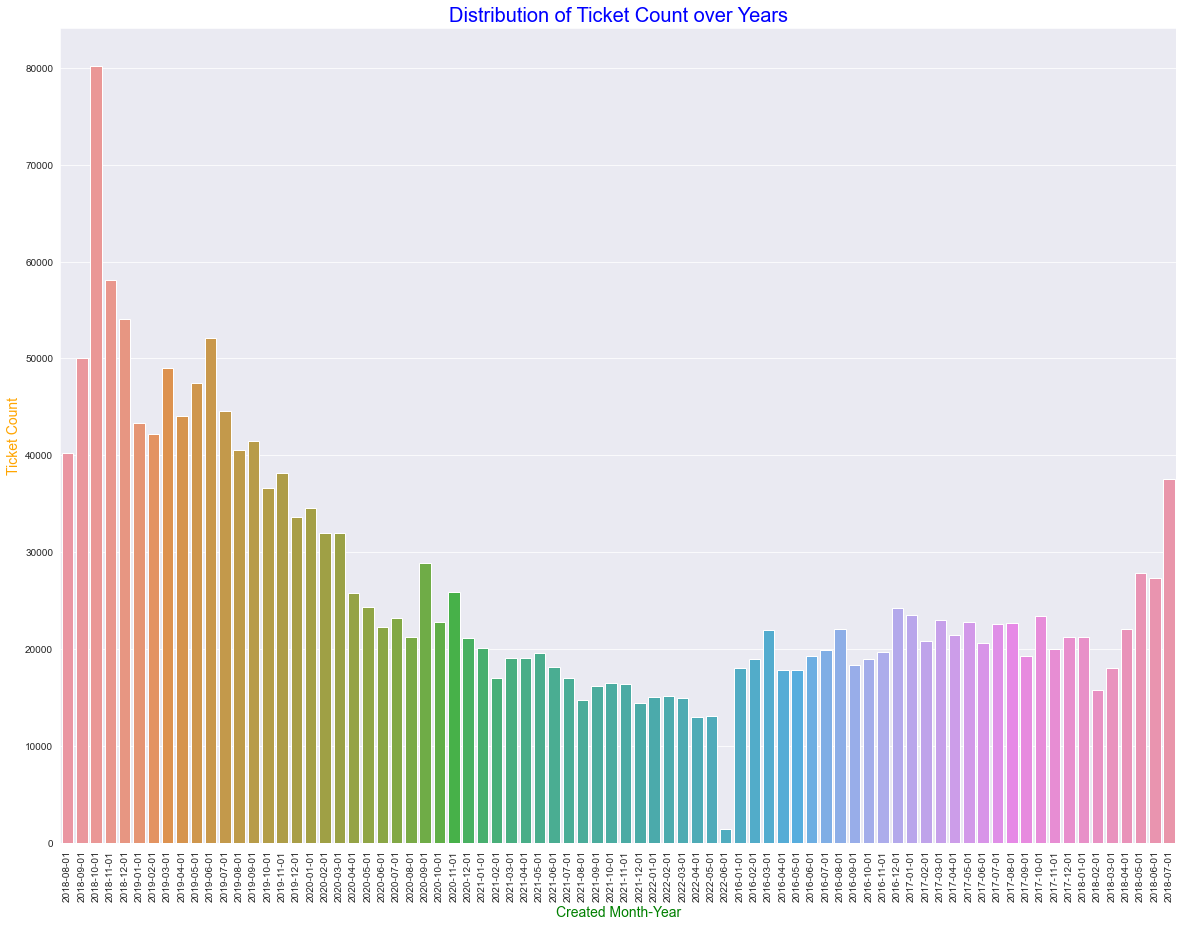

In [46]:
fig = plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.countplot(x="created_mmm_yy", data=df)
plt.xlabel("Created Month-Year",fontdict={'fontsize':14, 'color':'green'})
plt.ylabel("Ticket Count",fontdict={'fontsize':14, 'color':'orange'})
plt.title("Distribution of Ticket Count over Years", fontdict={'fontsize':20, 'color':'blue'}) 
plt.show(fig)

#### Defining a function to plot bar charts

In [47]:
def bar_plot(df, x, y, title, xlabel, ylabel,dpi=100):
    plt.figure(figsize=(20,20),dpi=dpi)
    df.plot.bar(x,y)
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()

P0 Incident Tickets w.r.t each product -

Prod4


<Figure size 2000x2000 with 0 Axes>

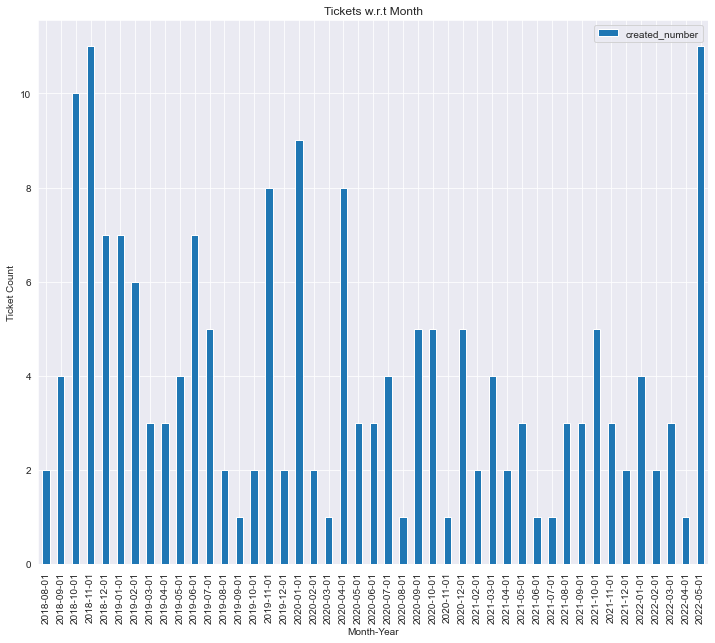

Prod8


<Figure size 2000x2000 with 0 Axes>

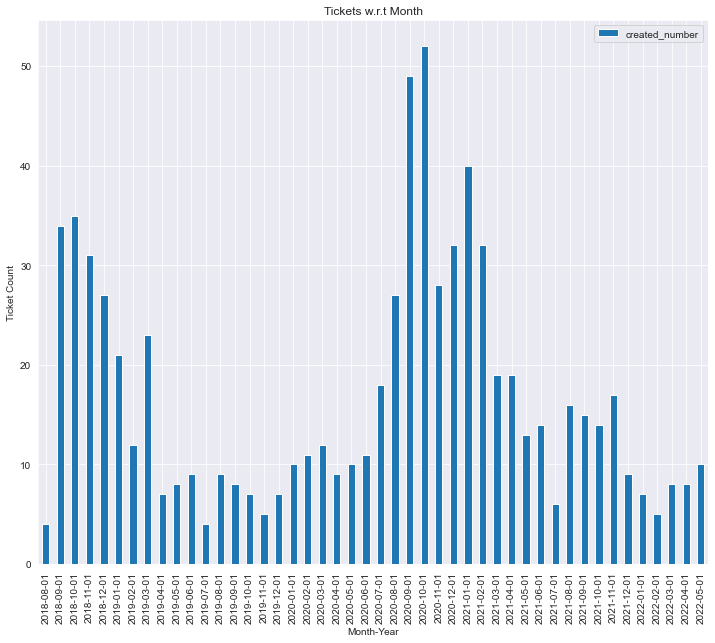

Prod12


<Figure size 2000x2000 with 0 Axes>

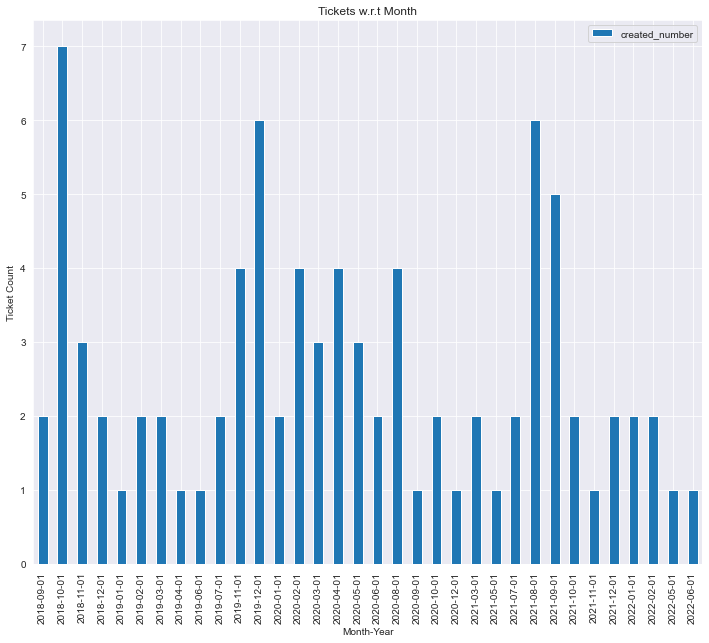

Prod14


<Figure size 2000x2000 with 0 Axes>

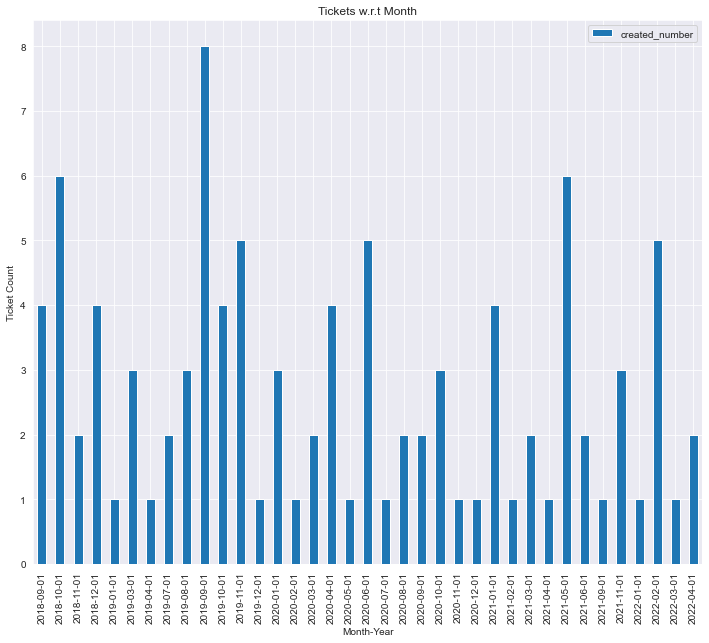

Prod2


<Figure size 2000x2000 with 0 Axes>

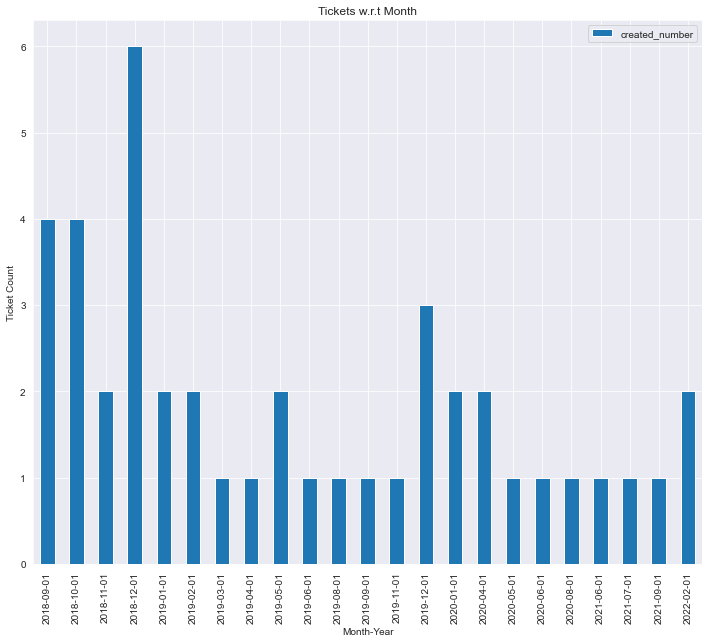

Prod7


<Figure size 2000x2000 with 0 Axes>

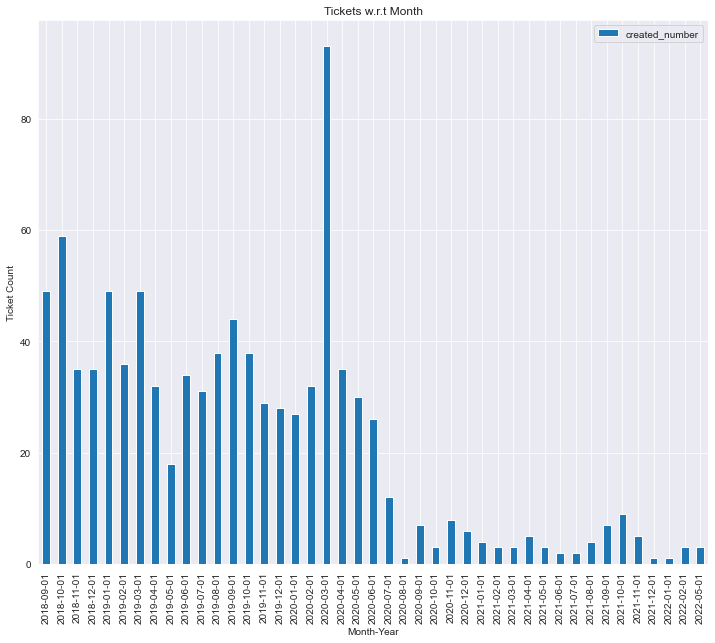

Prod9


<Figure size 2000x2000 with 0 Axes>

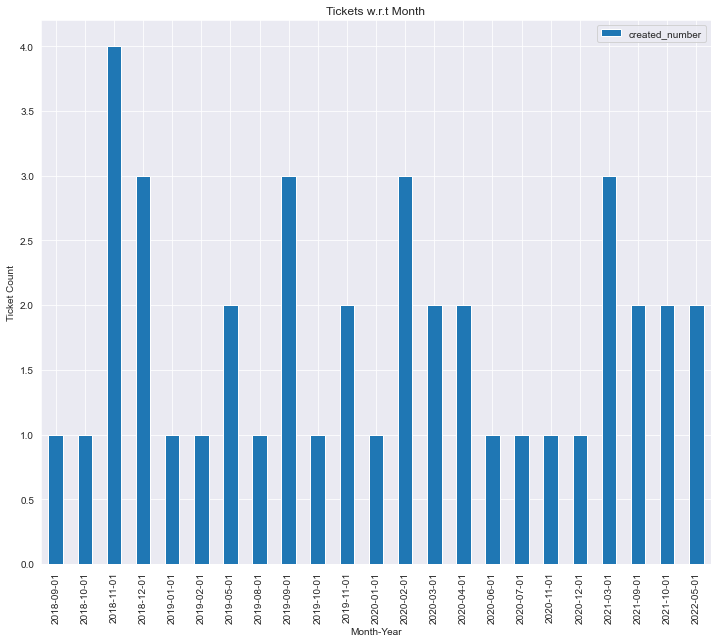

Prod1


<Figure size 2000x2000 with 0 Axes>

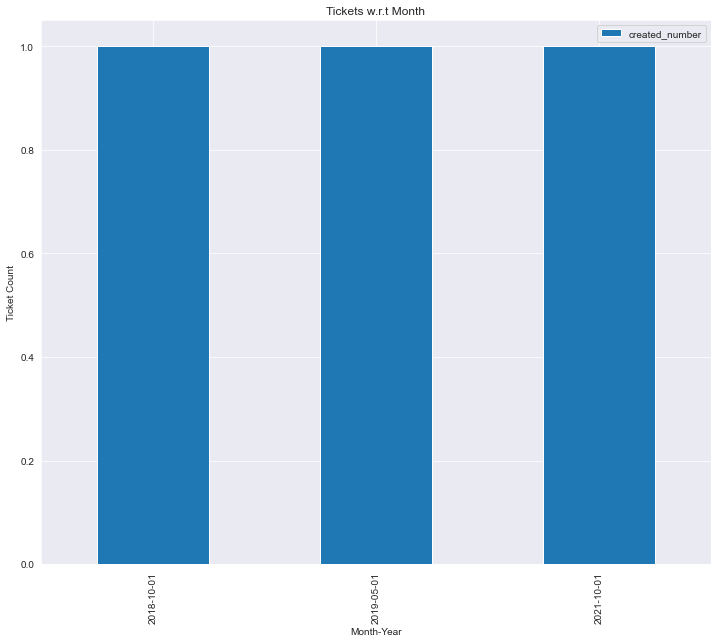

Prod10


<Figure size 2000x2000 with 0 Axes>

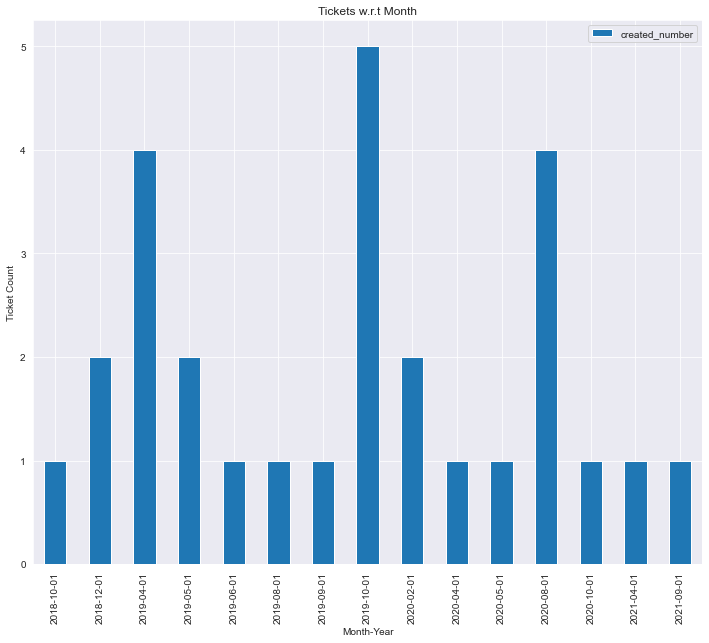

Prod11


<Figure size 2000x2000 with 0 Axes>

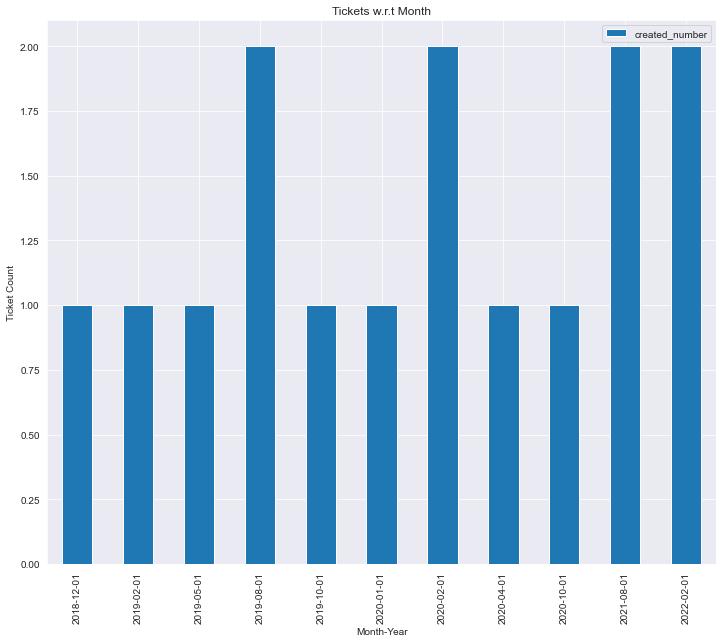

Prod13


<Figure size 2000x2000 with 0 Axes>

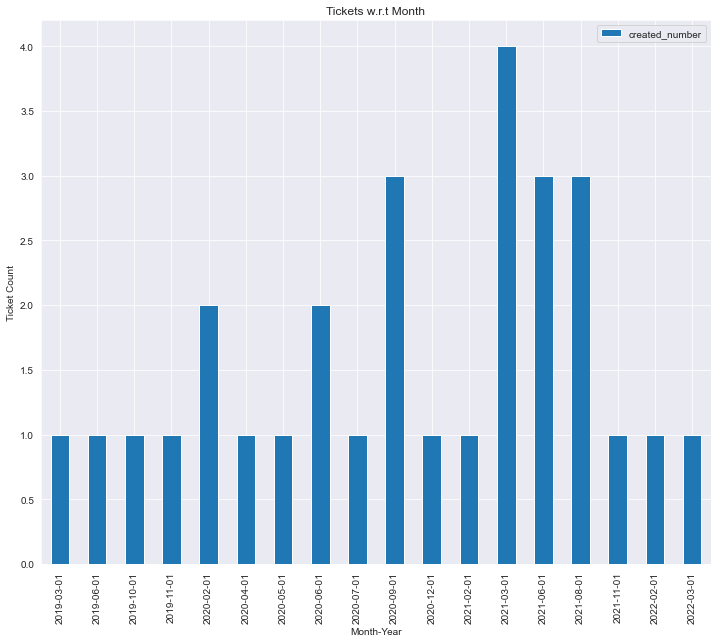

Prod3


<Figure size 2000x2000 with 0 Axes>

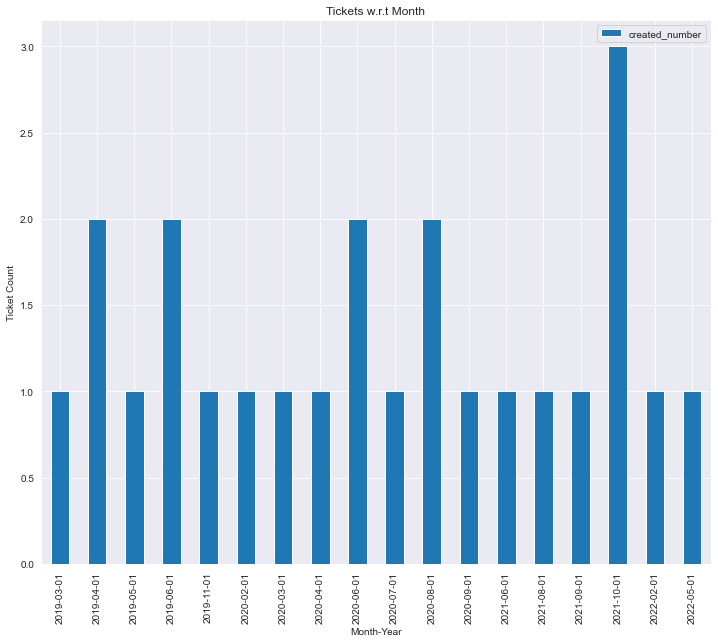

Prod5


<Figure size 2000x2000 with 0 Axes>

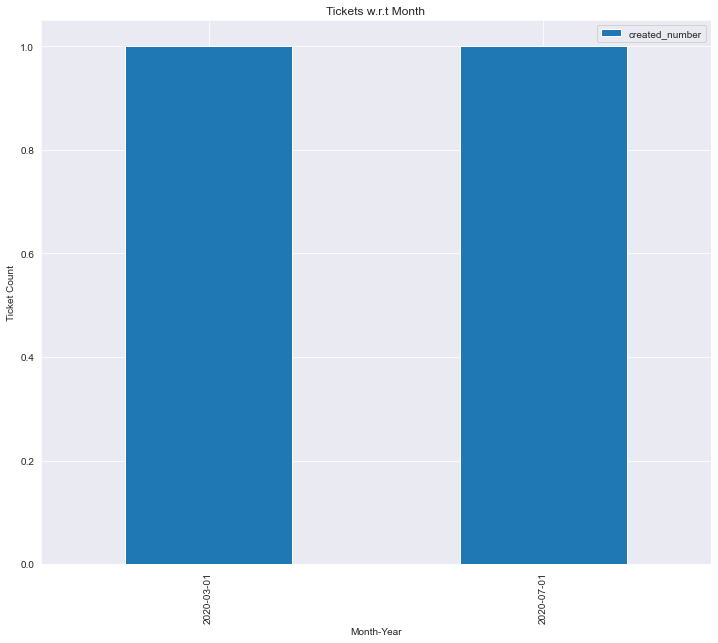

In [48]:
print("P0 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P0['product'].unique():
    print(i)
    bar_plot(df_count_P0[df_count_P0['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


P1 Incident Tickets w.r.t each product -

Prod10


<Figure size 2000x2000 with 0 Axes>

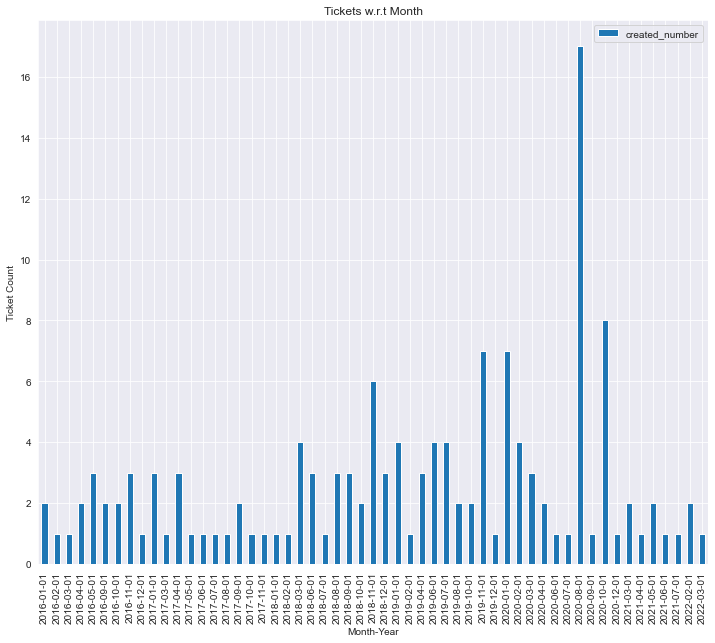

Prod11


<Figure size 2000x2000 with 0 Axes>

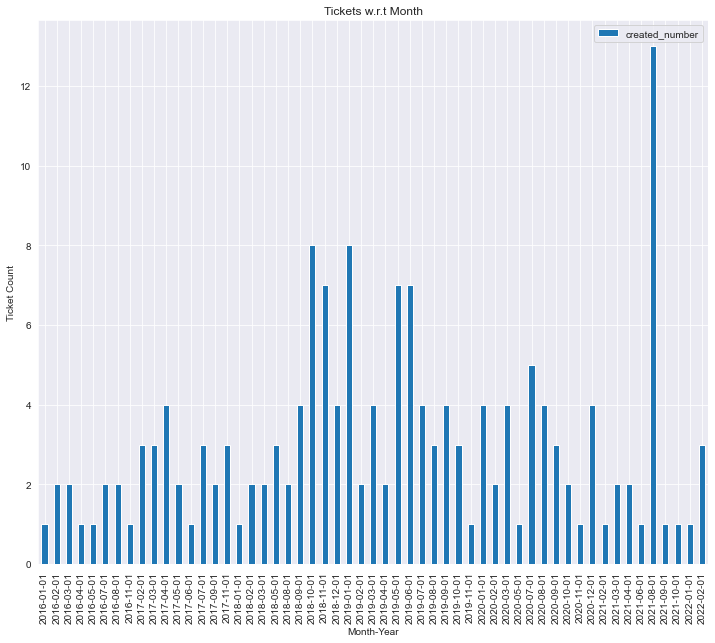

Prod12


<Figure size 2000x2000 with 0 Axes>

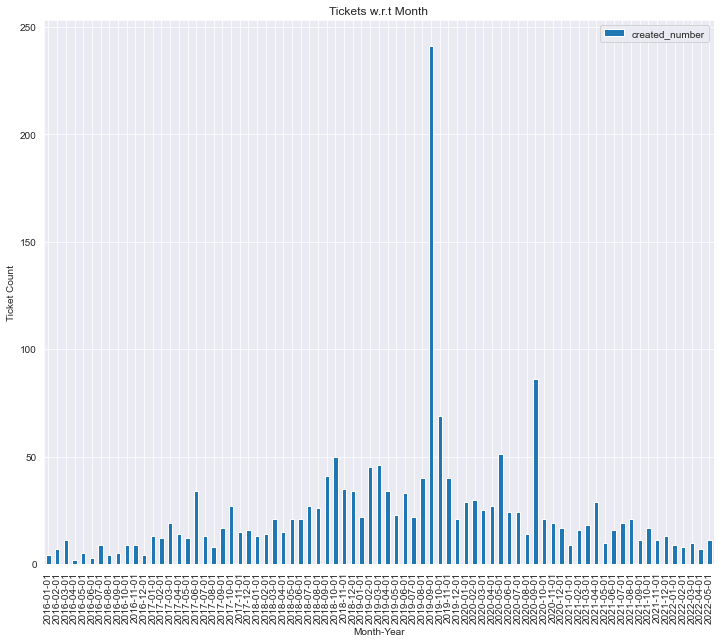

Prod14


<Figure size 2000x2000 with 0 Axes>

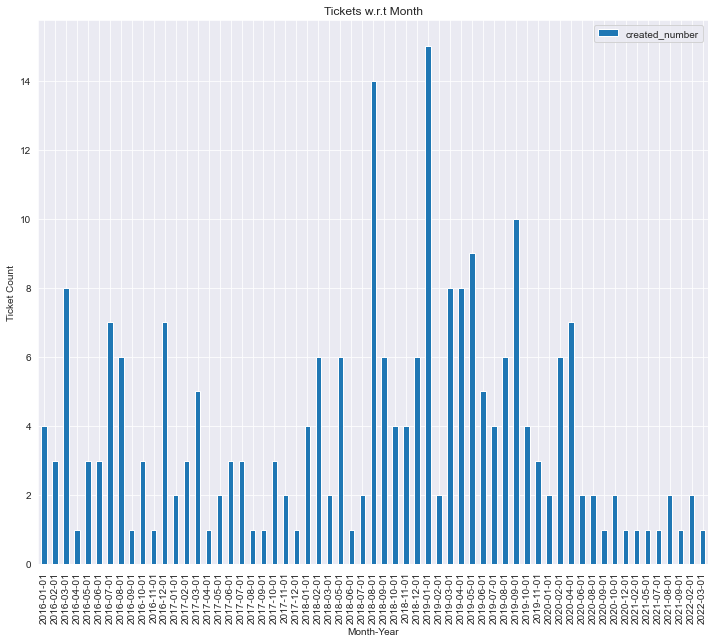

Prod2


<Figure size 2000x2000 with 0 Axes>

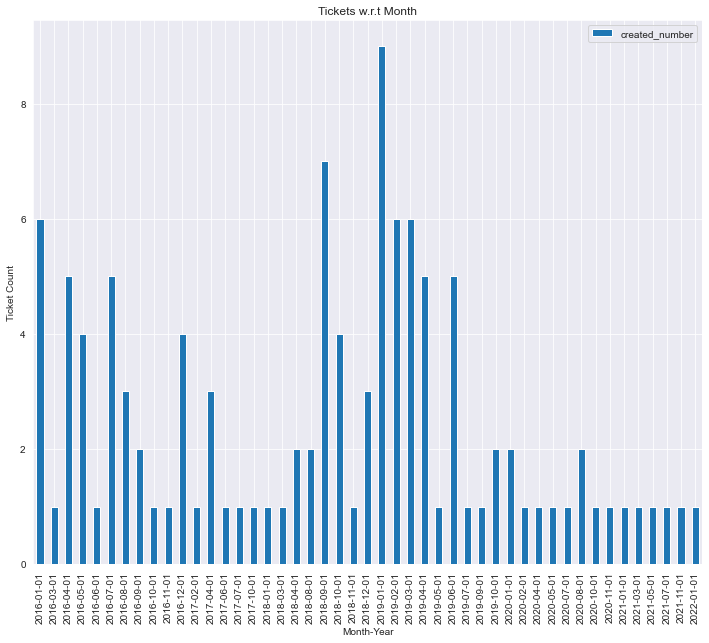

Prod3


<Figure size 2000x2000 with 0 Axes>

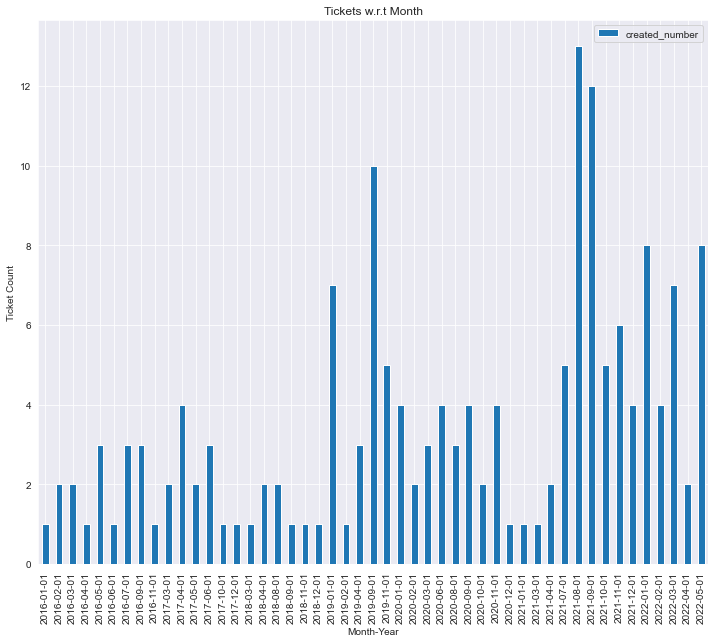

Prod4


<Figure size 2000x2000 with 0 Axes>

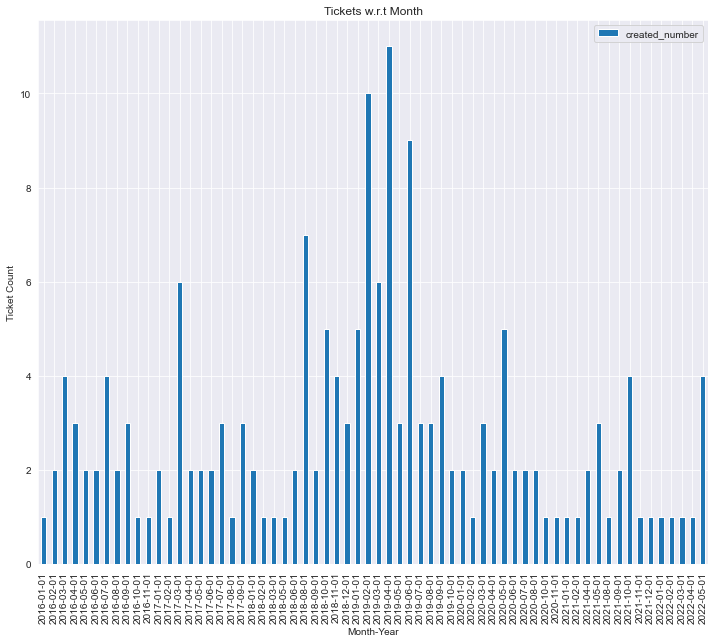

Prod5


<Figure size 2000x2000 with 0 Axes>

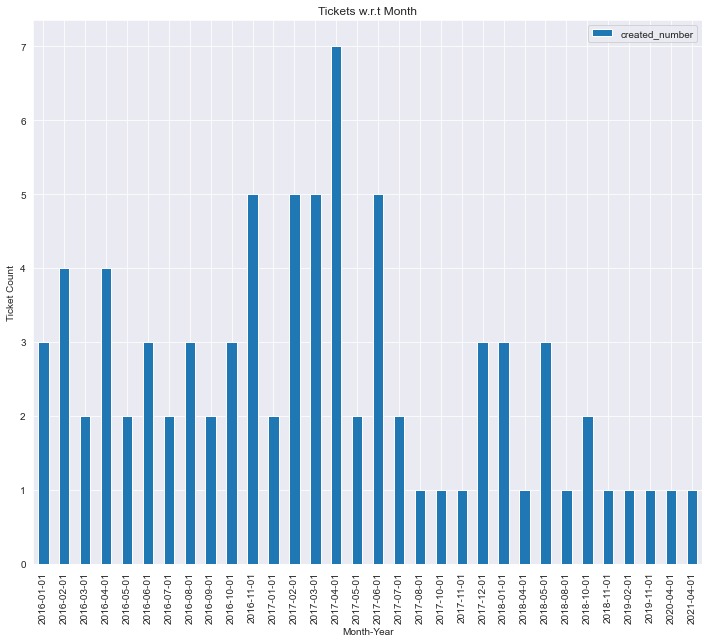

Prod8


<Figure size 2000x2000 with 0 Axes>

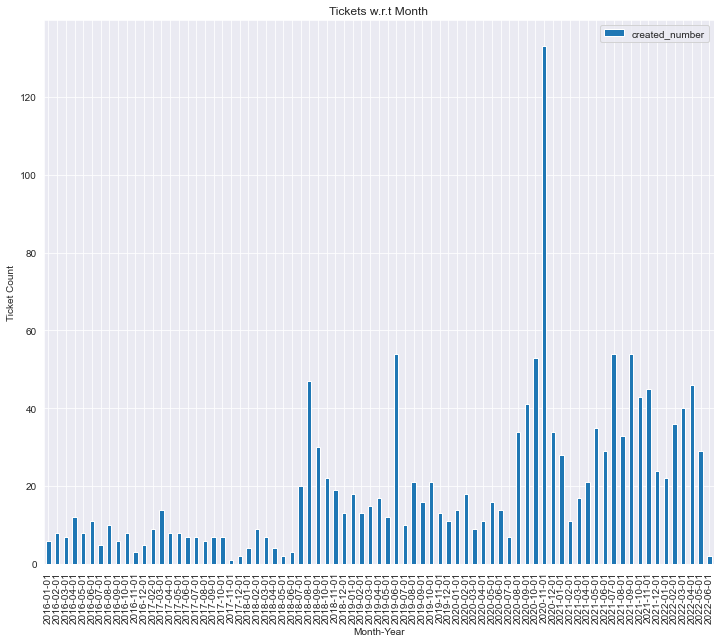

Prod9


<Figure size 2000x2000 with 0 Axes>

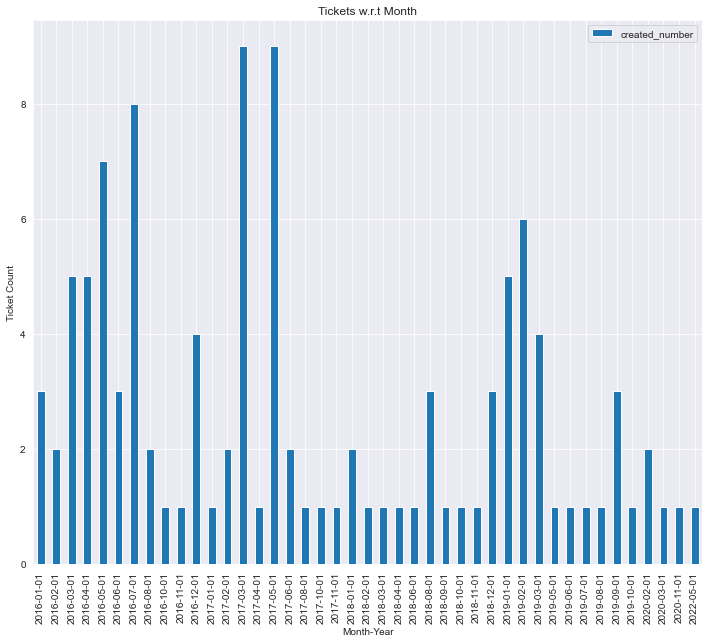

Prod1


<Figure size 2000x2000 with 0 Axes>

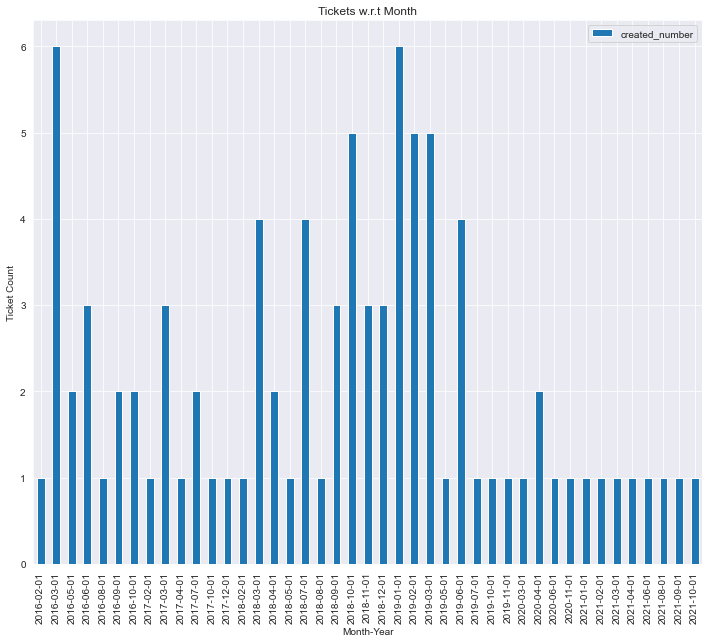

Prod7


<Figure size 2000x2000 with 0 Axes>

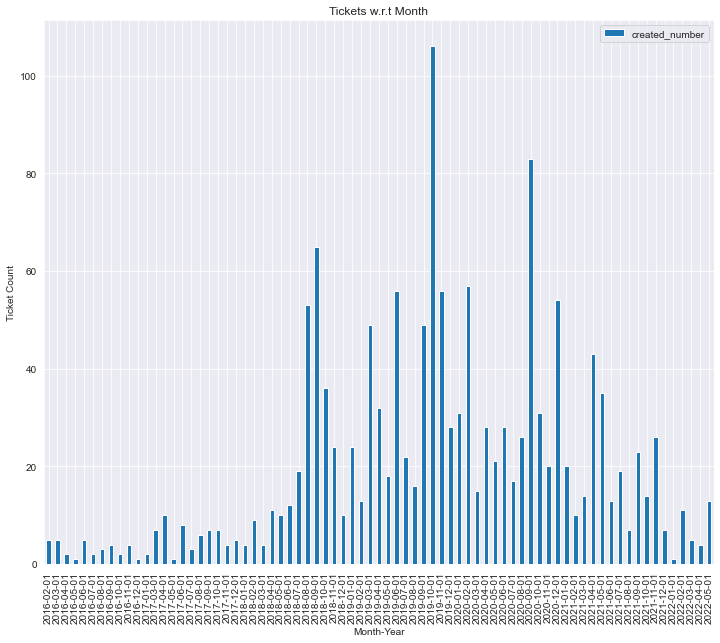

Prod13


<Figure size 2000x2000 with 0 Axes>

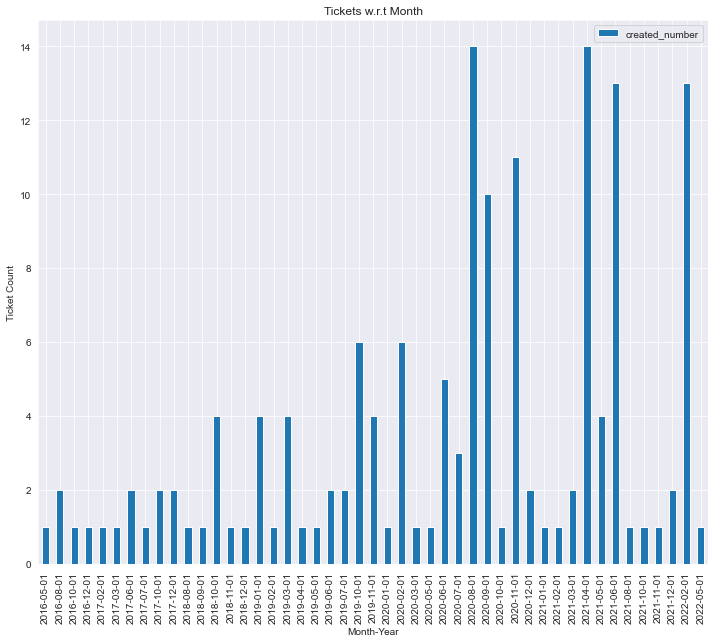

Prod6


<Figure size 2000x2000 with 0 Axes>

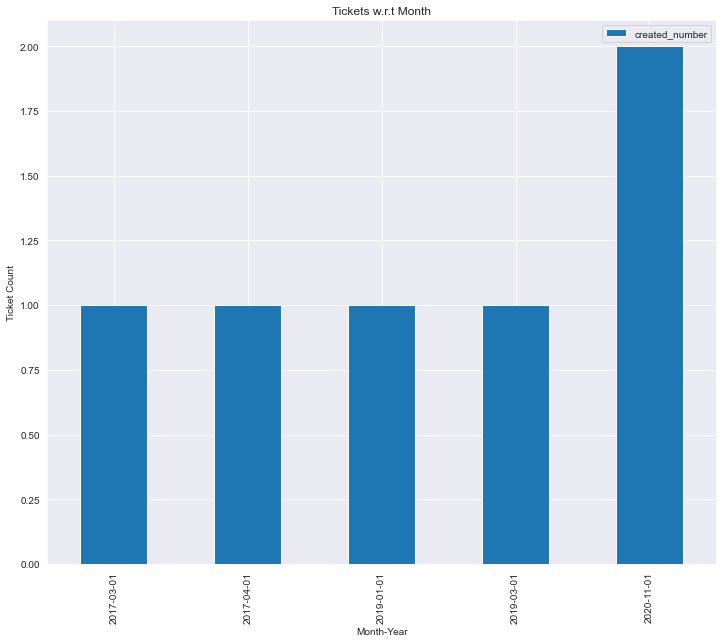

In [49]:
print("P1 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P1['product'].unique():
    print(i)
    bar_plot(df_count_P1[df_count_P1['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


P2 Incident Tickets w.r.t each product -

Prod1


<Figure size 2000x2000 with 0 Axes>

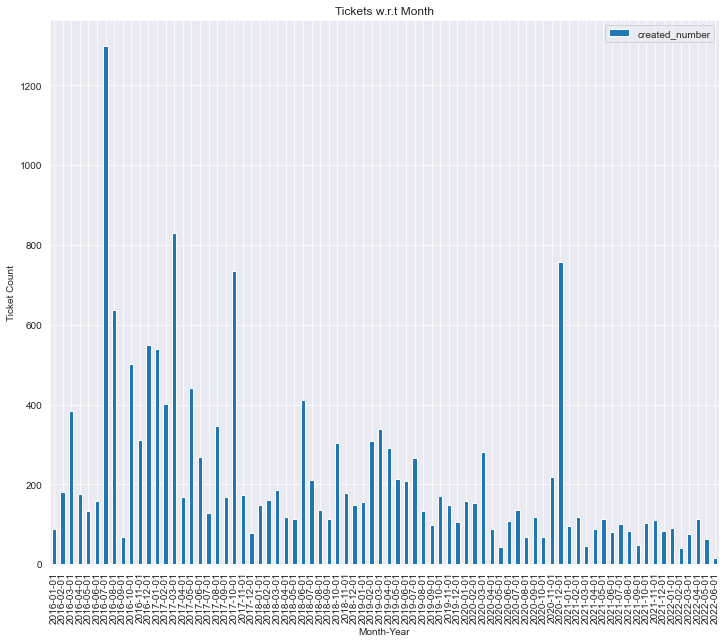

Prod10


<Figure size 2000x2000 with 0 Axes>

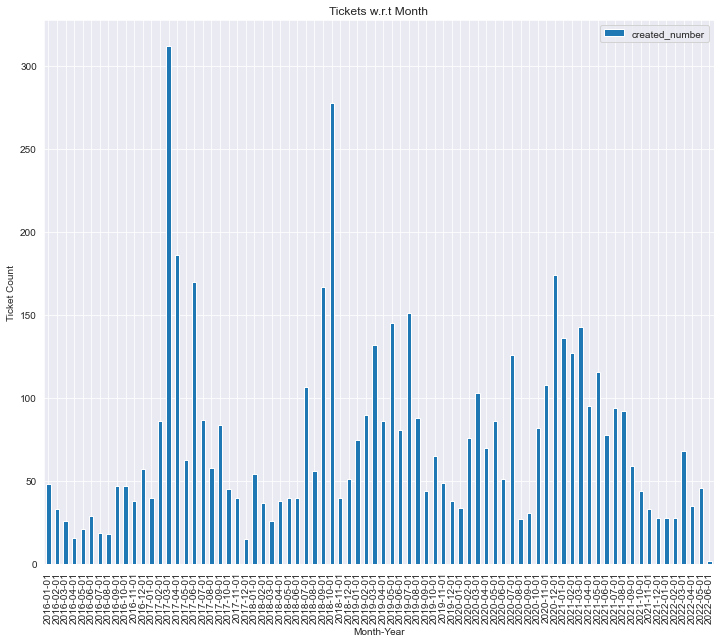

Prod11


<Figure size 2000x2000 with 0 Axes>

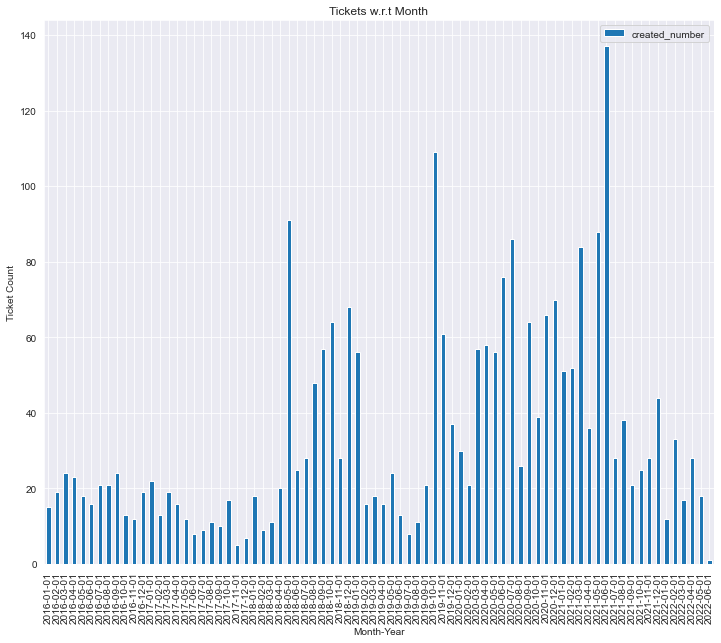

Prod12


<Figure size 2000x2000 with 0 Axes>

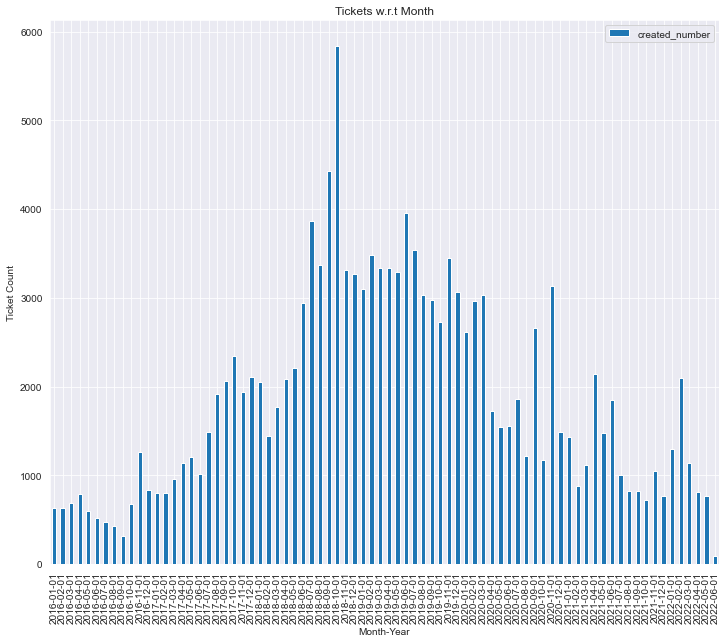

Prod13


<Figure size 2000x2000 with 0 Axes>

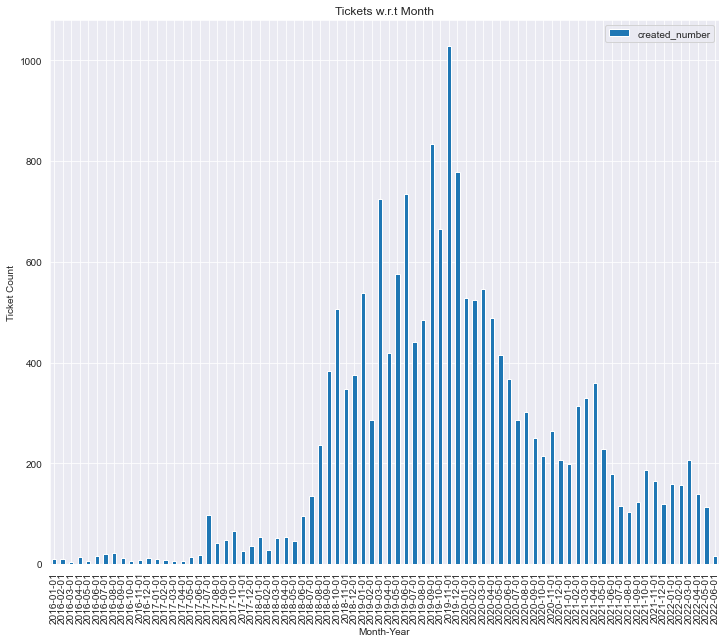

Prod14


<Figure size 2000x2000 with 0 Axes>

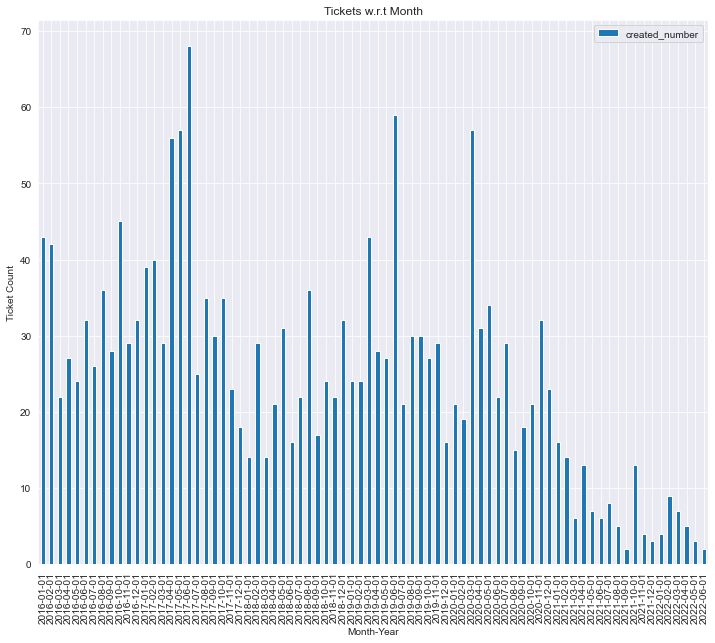

Prod2


<Figure size 2000x2000 with 0 Axes>

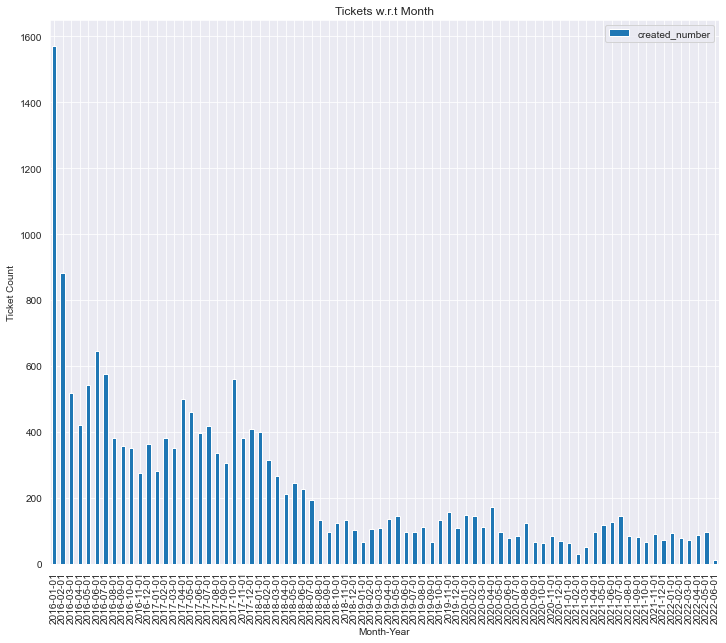

Prod3


<Figure size 2000x2000 with 0 Axes>

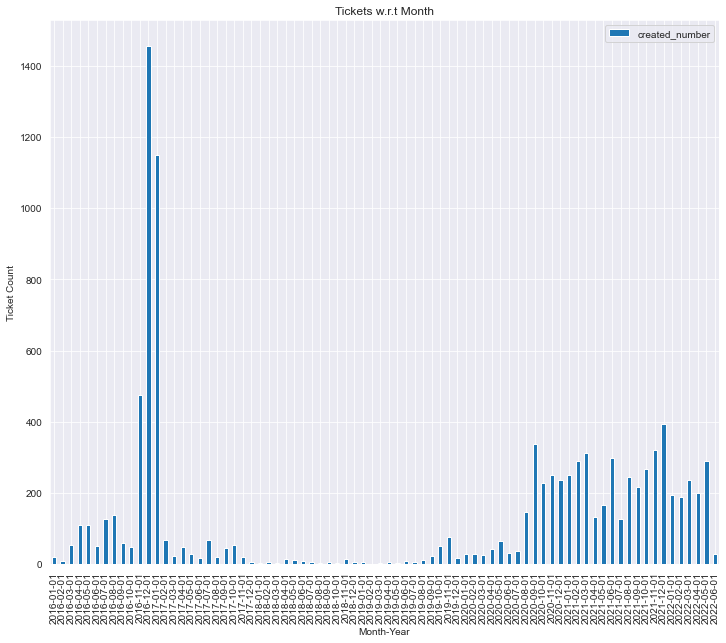

Prod4


<Figure size 2000x2000 with 0 Axes>

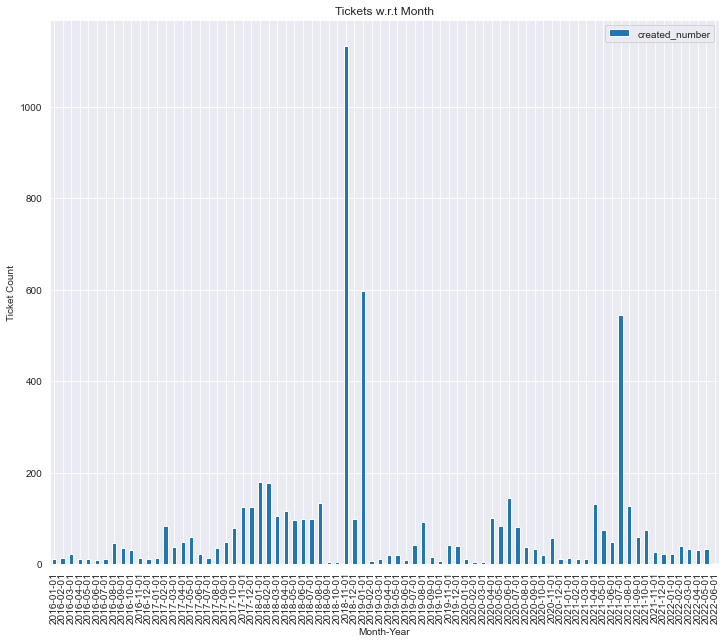

Prod5


<Figure size 2000x2000 with 0 Axes>

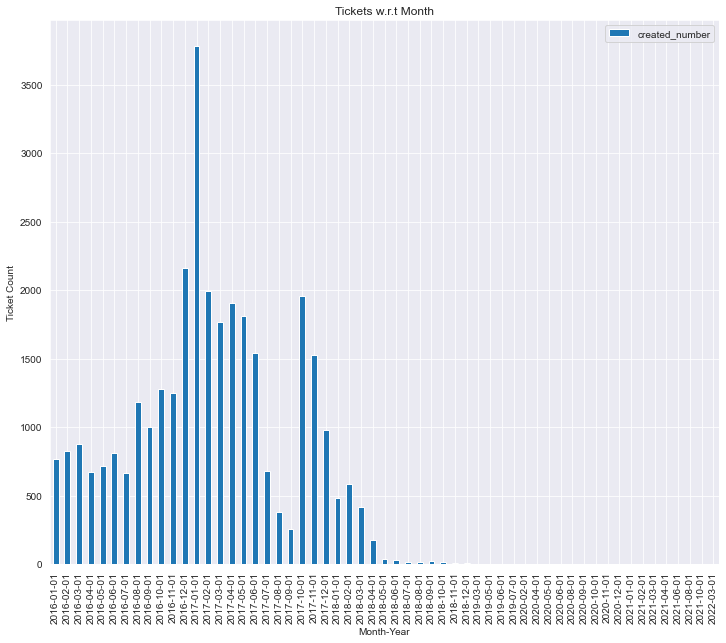

Prod7


<Figure size 2000x2000 with 0 Axes>

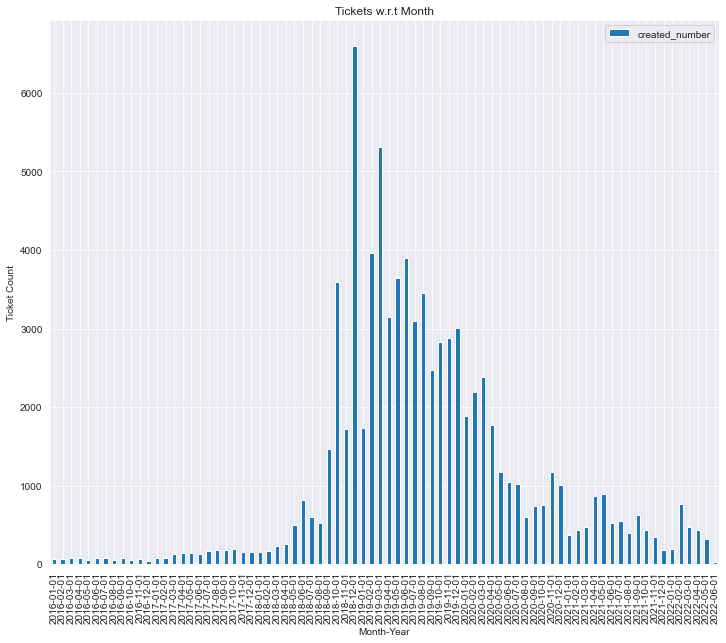

Prod8


<Figure size 2000x2000 with 0 Axes>

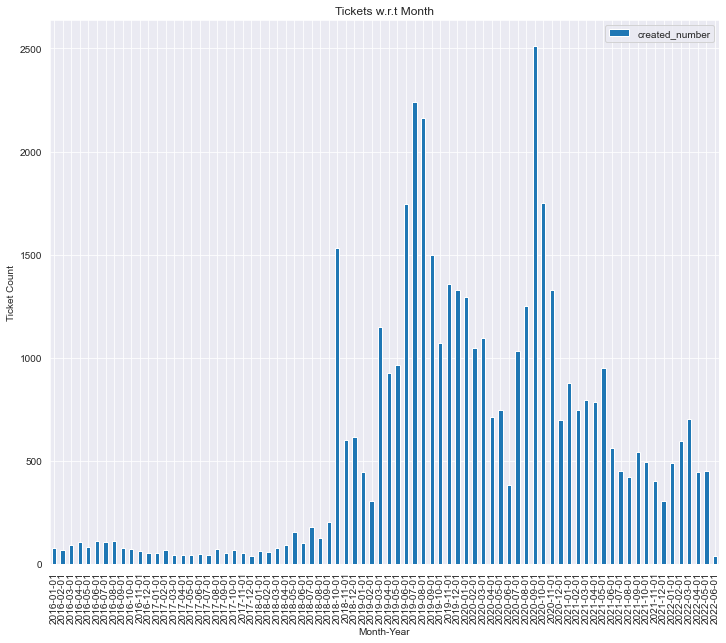

Prod9


<Figure size 2000x2000 with 0 Axes>

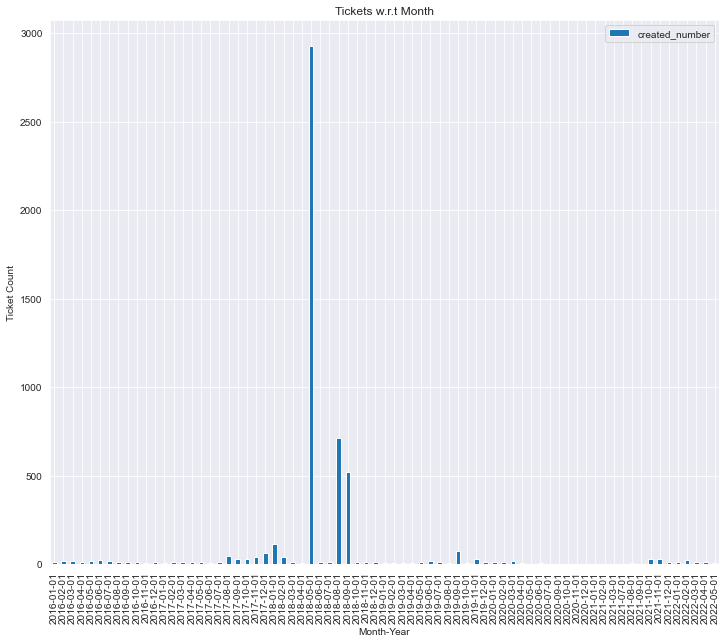

Prod6


<Figure size 2000x2000 with 0 Axes>

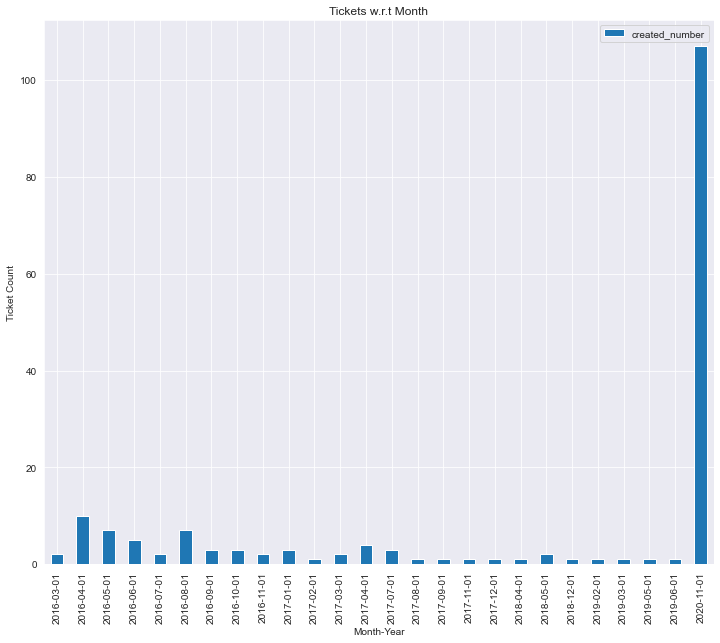

In [50]:
print("P2 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P2['product'].unique():
    print(i)
    bar_plot(df_count_P2[df_count_P2['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


P3 Incident Tickets w.r.t each product -

Prod1


<Figure size 2000x2000 with 0 Axes>

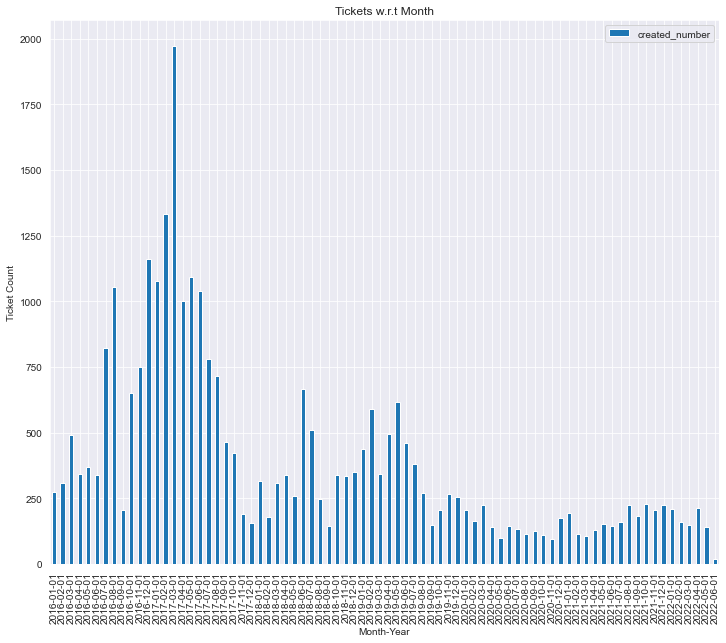

Prod10


<Figure size 2000x2000 with 0 Axes>

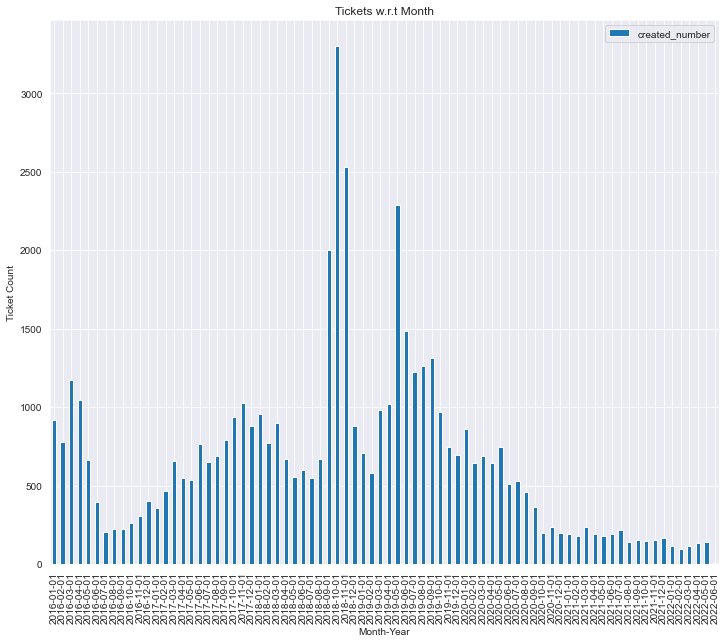

Prod11


<Figure size 2000x2000 with 0 Axes>

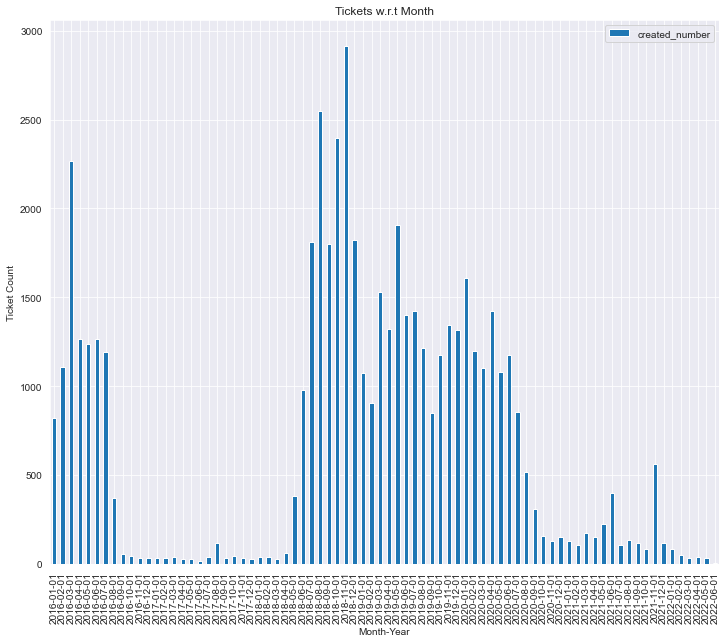

Prod12


<Figure size 2000x2000 with 0 Axes>

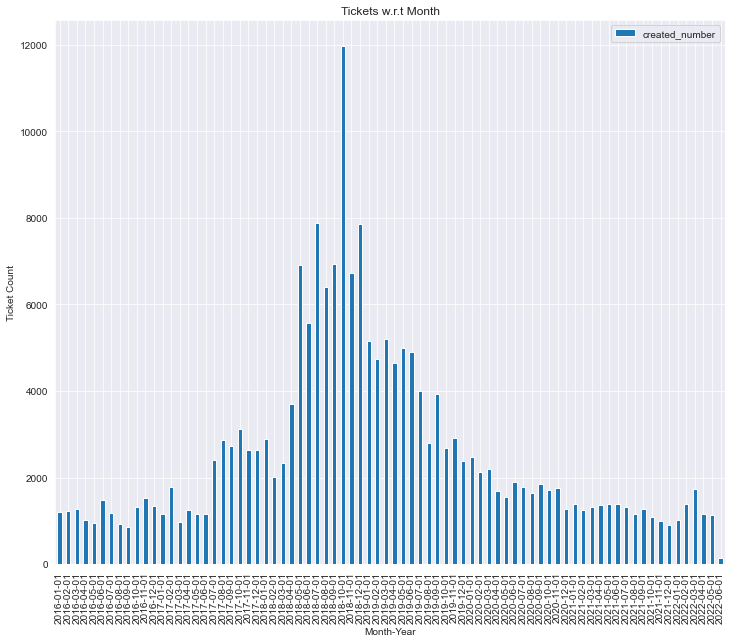

Prod13


<Figure size 2000x2000 with 0 Axes>

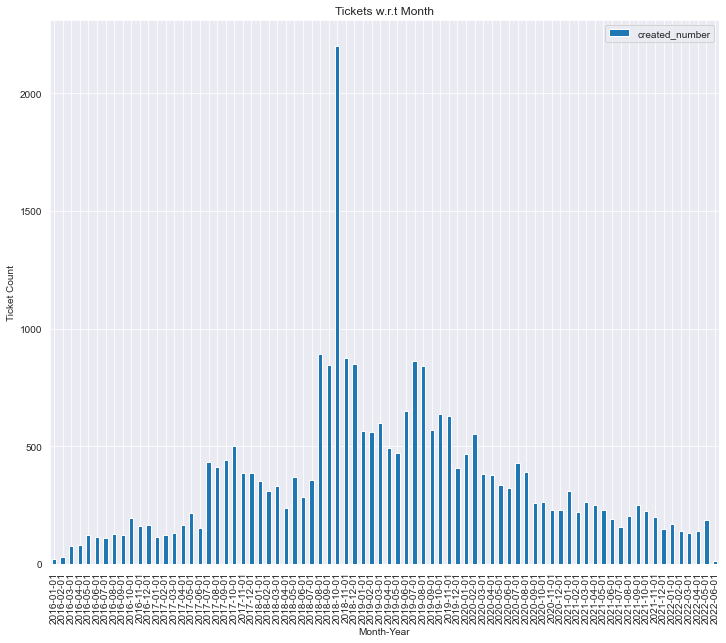

Prod14


<Figure size 2000x2000 with 0 Axes>

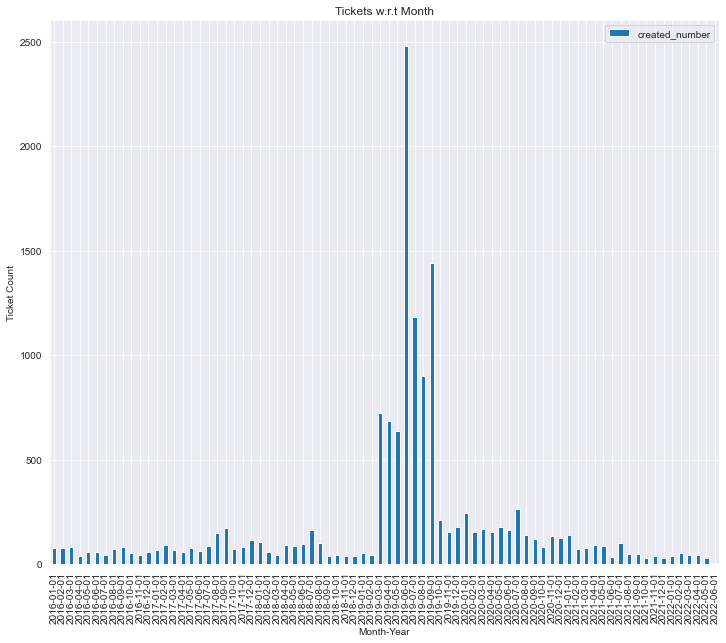

Prod2


<Figure size 2000x2000 with 0 Axes>

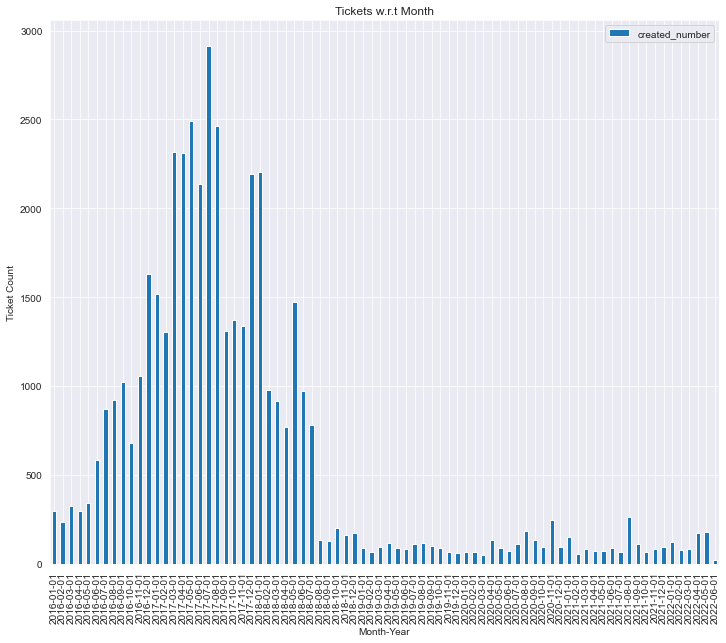

Prod3


<Figure size 2000x2000 with 0 Axes>

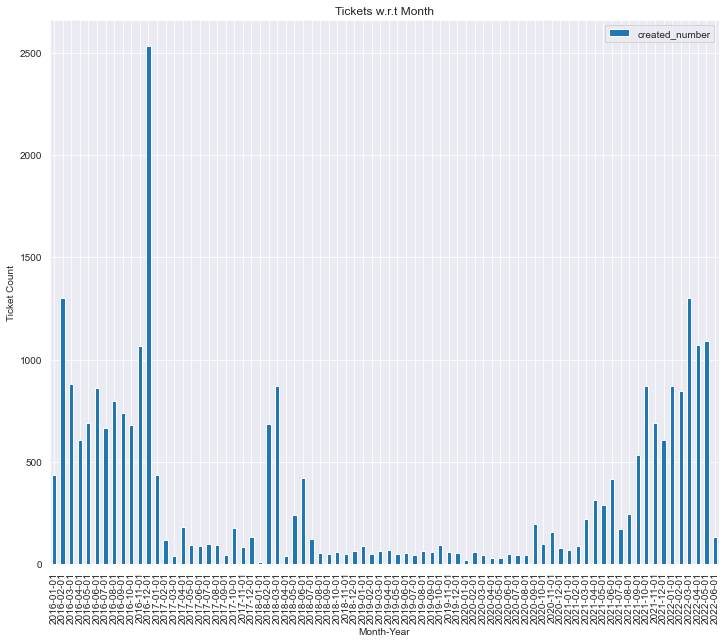

Prod4


<Figure size 2000x2000 with 0 Axes>

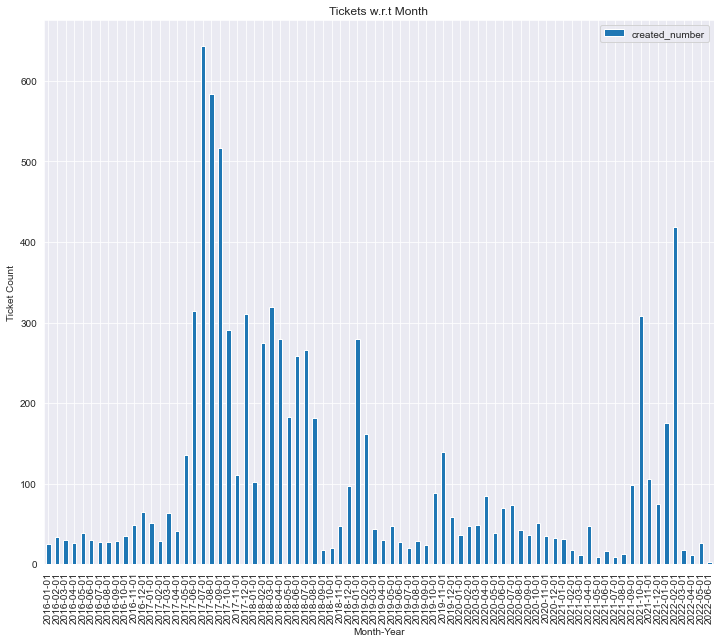

Prod5


<Figure size 2000x2000 with 0 Axes>

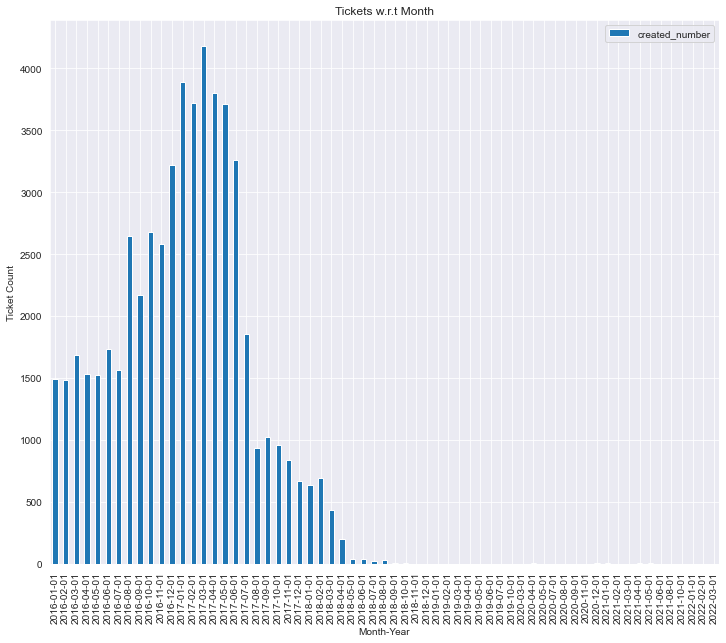

Prod6


<Figure size 2000x2000 with 0 Axes>

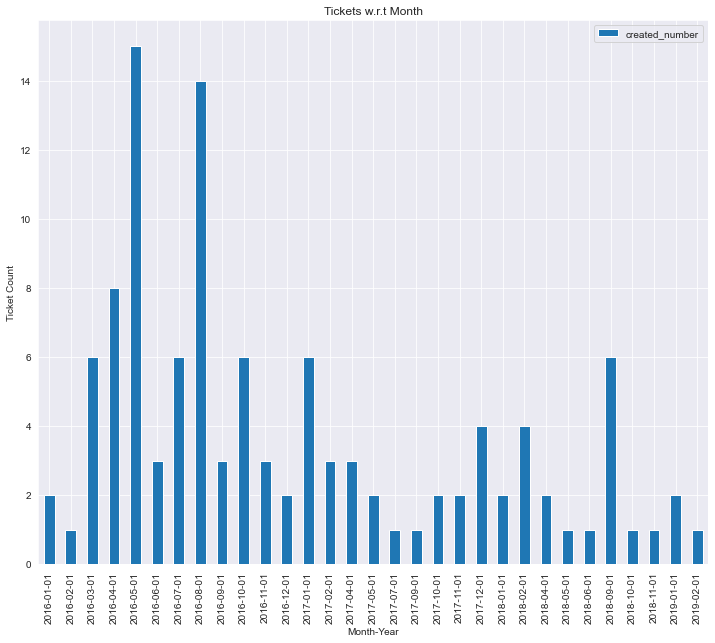

Prod7


<Figure size 2000x2000 with 0 Axes>

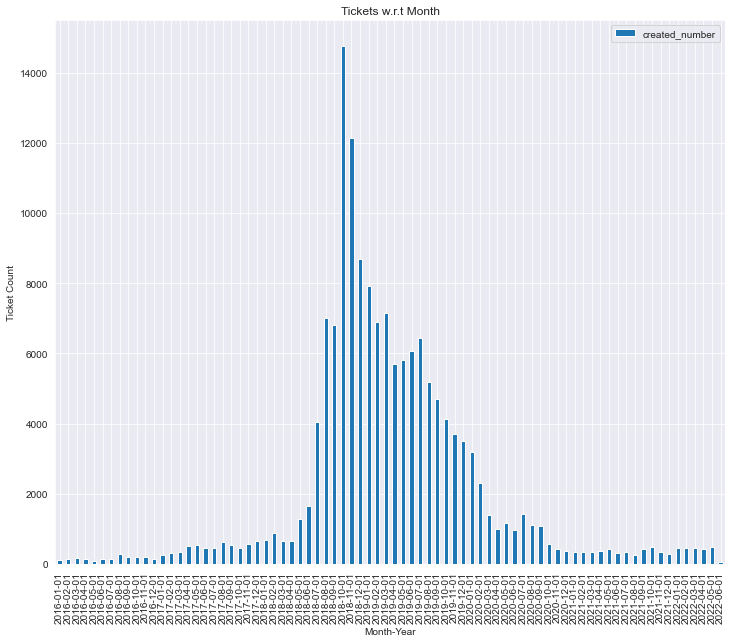

Prod8


<Figure size 2000x2000 with 0 Axes>

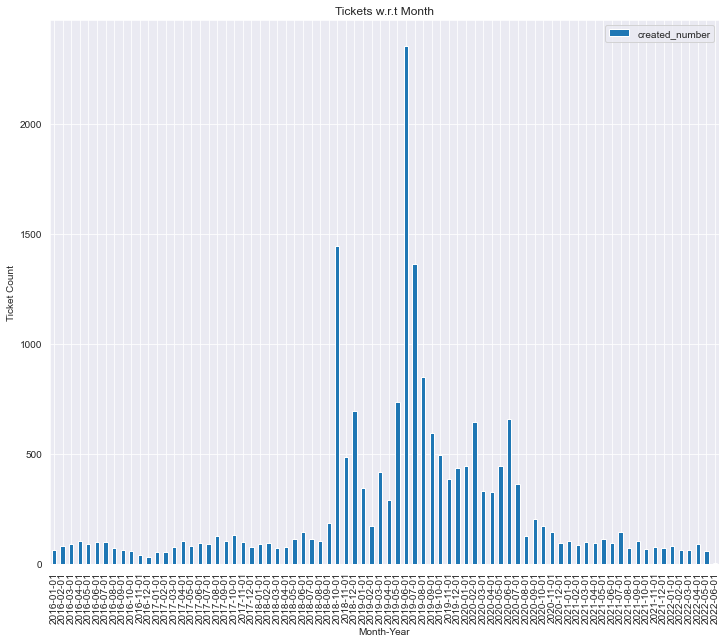

Prod9


<Figure size 2000x2000 with 0 Axes>

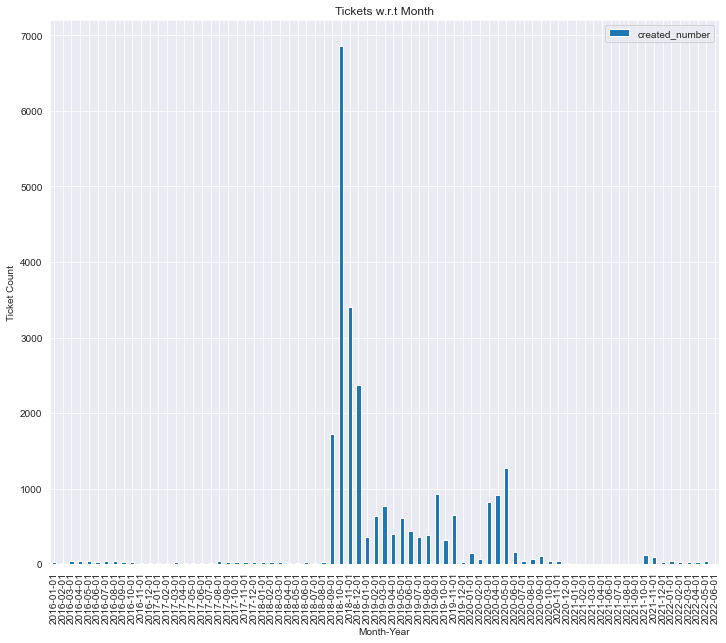

In [51]:
print("P3 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P3['product'].unique():
    print(i)
    bar_plot(df_count_P3[df_count_P3['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


P4 Incident Tickets w.r.t each product -

Prod1


<Figure size 2000x2000 with 0 Axes>

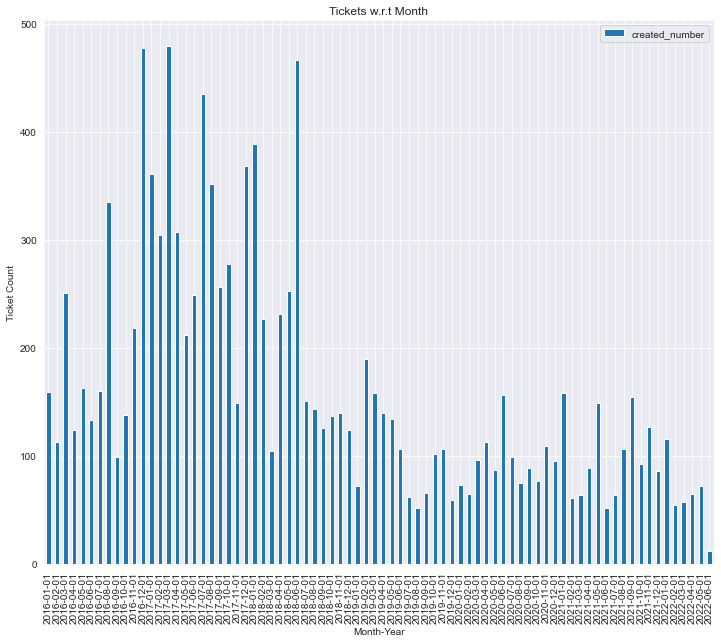

Prod10


<Figure size 2000x2000 with 0 Axes>

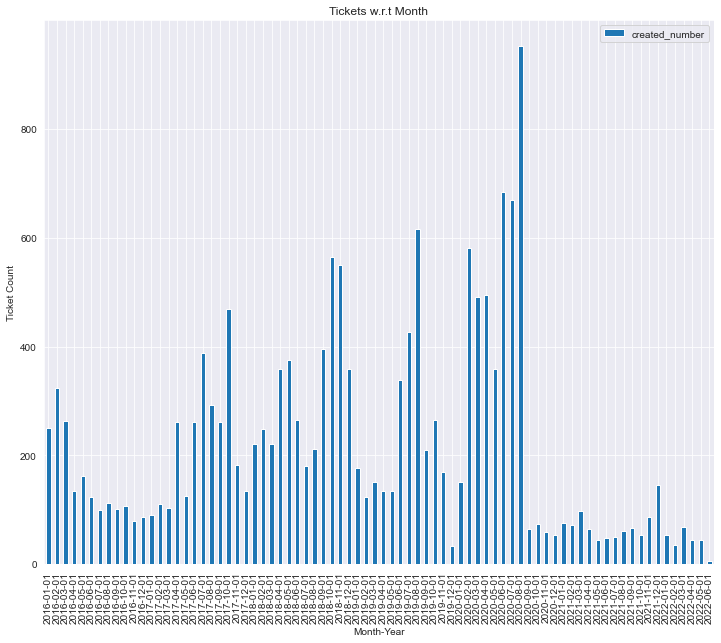

Prod11


<Figure size 2000x2000 with 0 Axes>

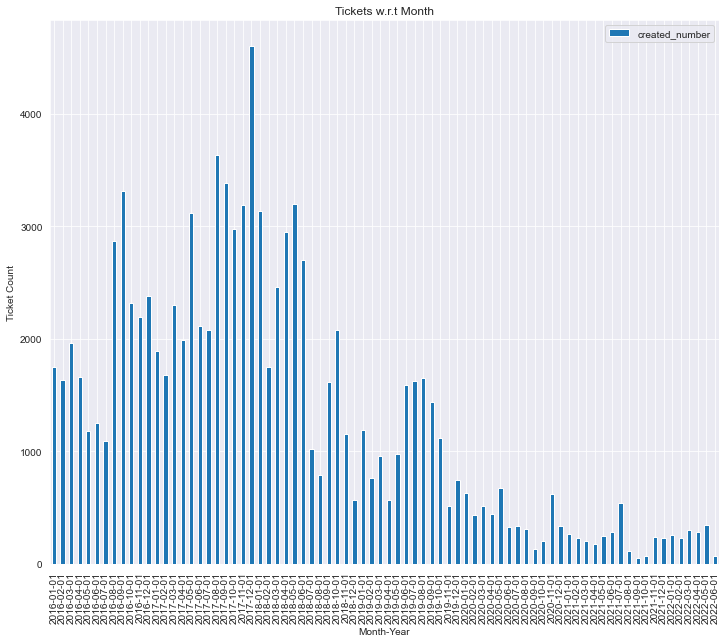

Prod12


<Figure size 2000x2000 with 0 Axes>

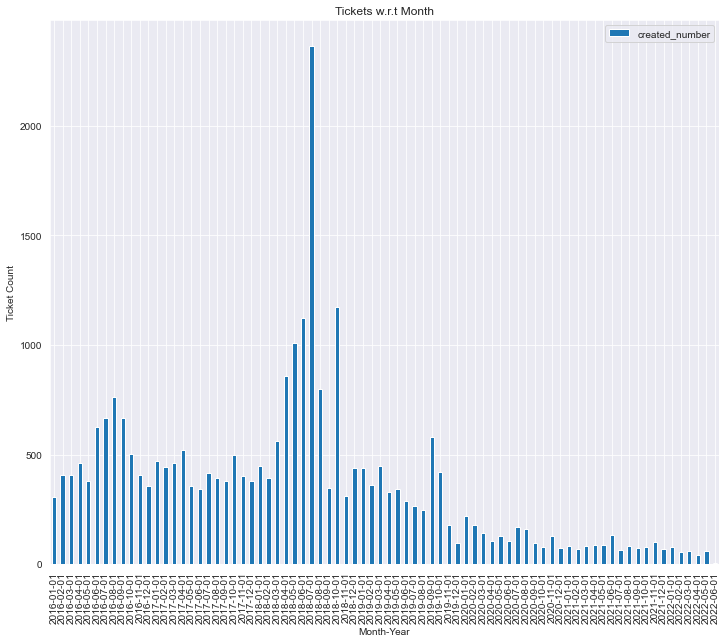

Prod13


<Figure size 2000x2000 with 0 Axes>

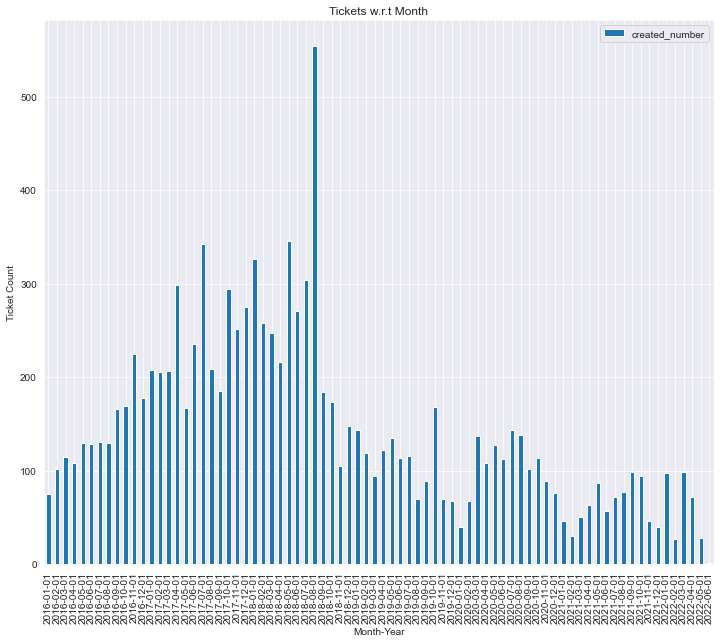

Prod14


<Figure size 2000x2000 with 0 Axes>

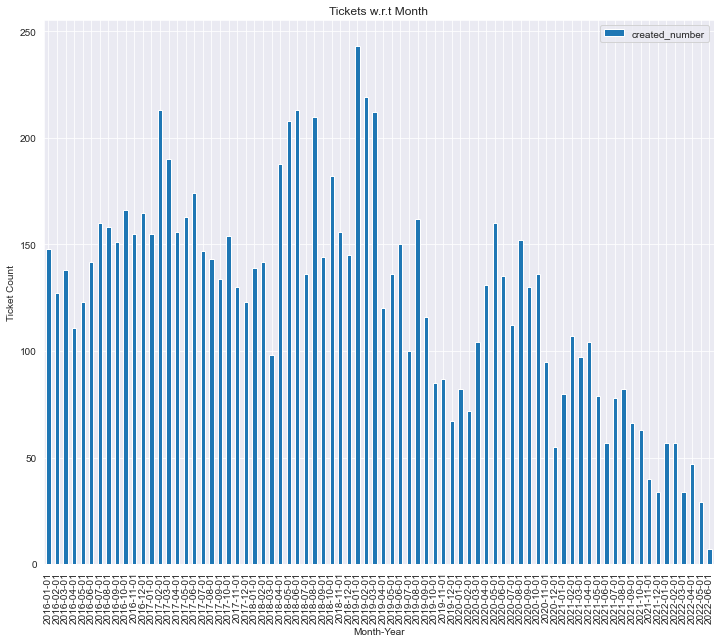

Prod2


<Figure size 2000x2000 with 0 Axes>

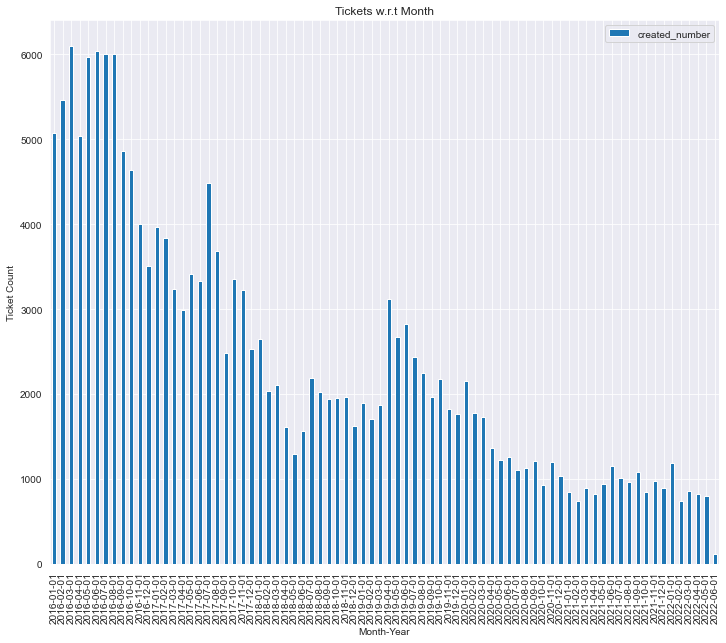

Prod3


<Figure size 2000x2000 with 0 Axes>

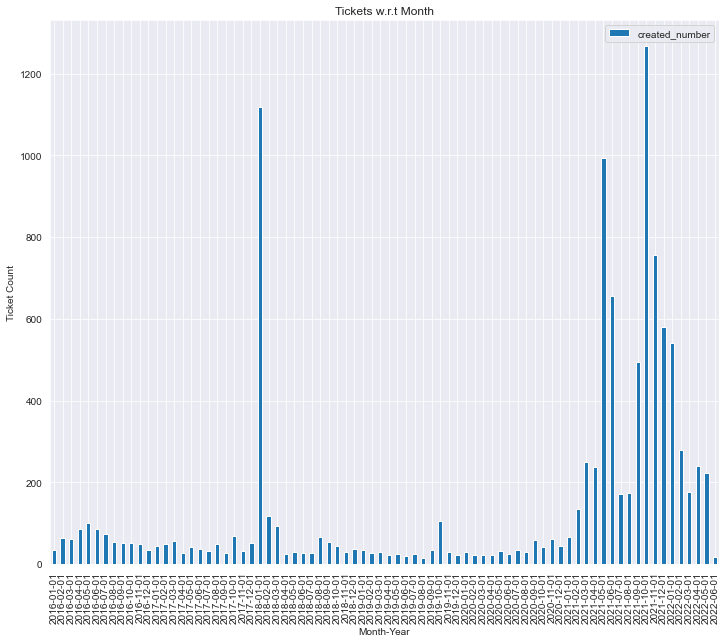

Prod4


<Figure size 2000x2000 with 0 Axes>

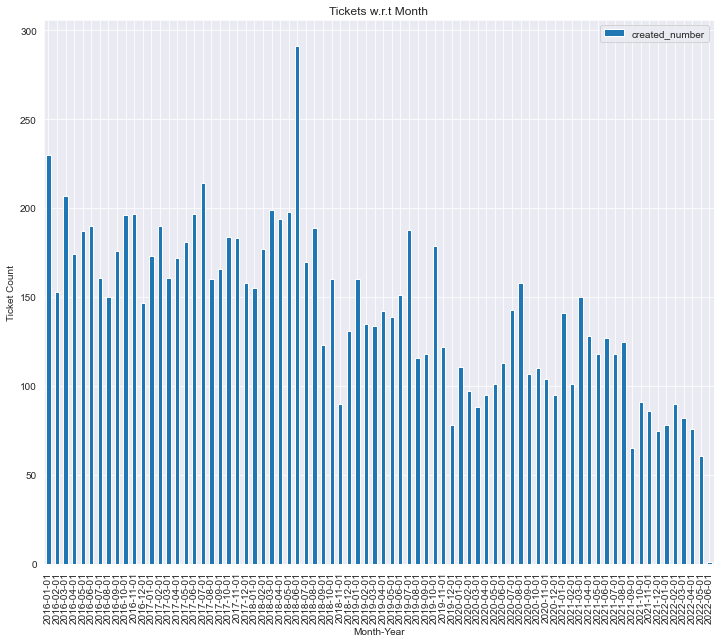

Prod5


<Figure size 2000x2000 with 0 Axes>

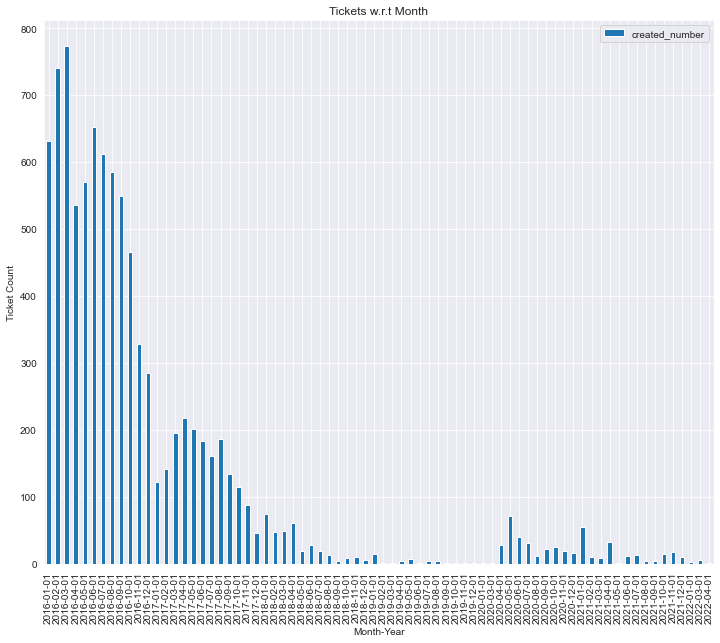

Prod6


<Figure size 2000x2000 with 0 Axes>

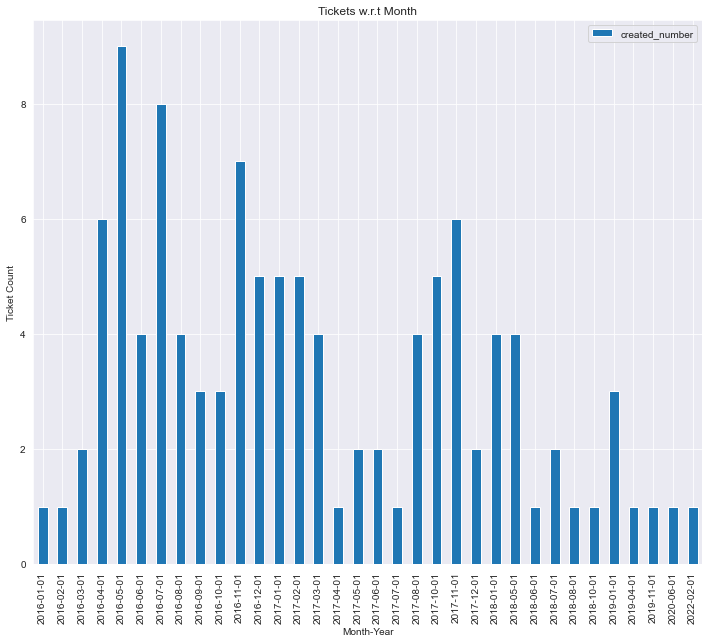

Prod7


<Figure size 2000x2000 with 0 Axes>

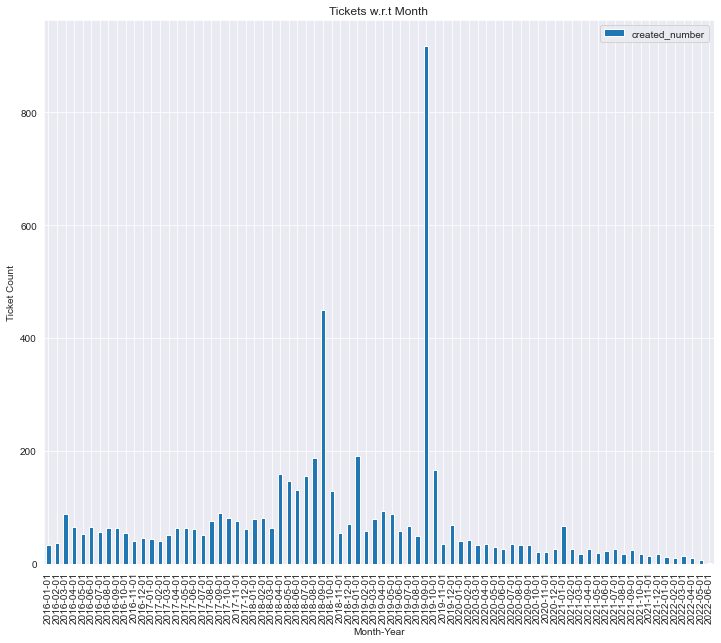

Prod8


<Figure size 2000x2000 with 0 Axes>

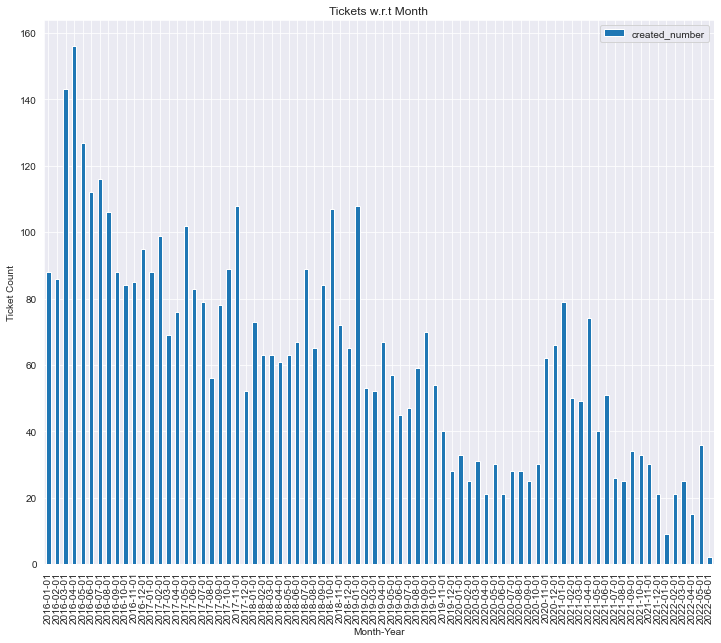

Prod9


<Figure size 2000x2000 with 0 Axes>

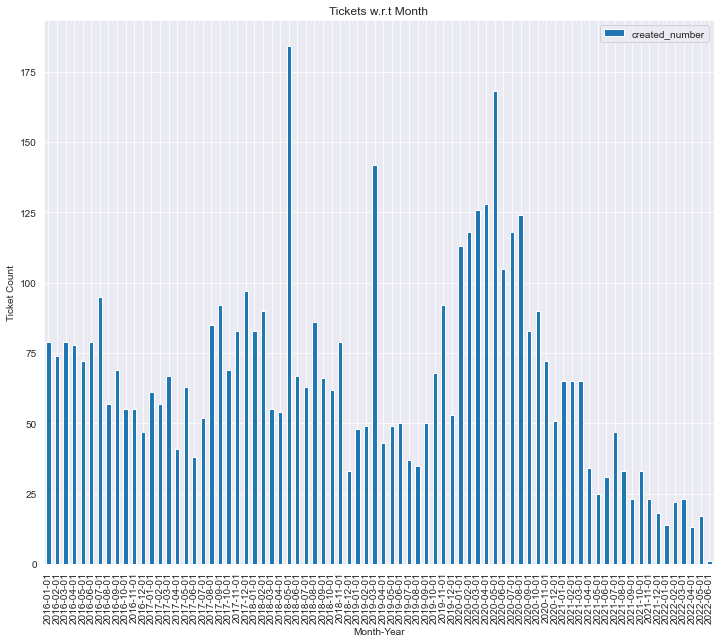

Prod15


<Figure size 2000x2000 with 0 Axes>

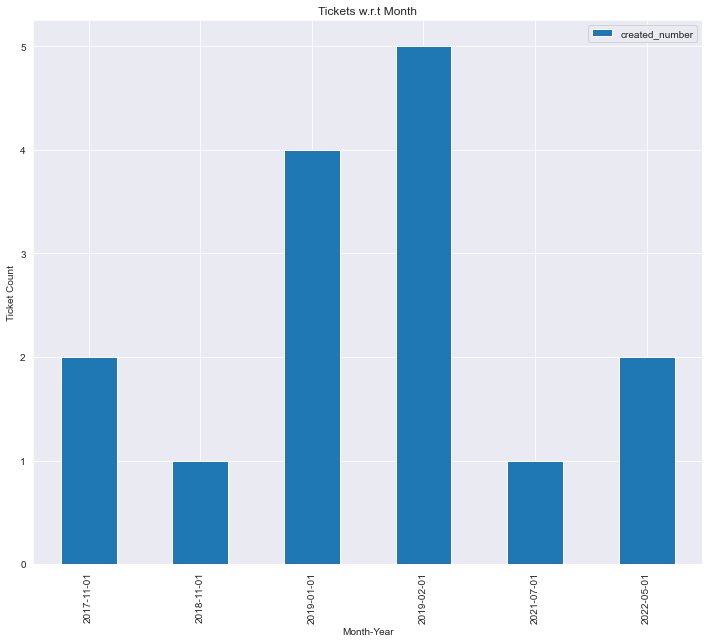

In [52]:
print("P4 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P4['product'].unique():
    print(i)
    bar_plot(df_count_P4[df_count_P4['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


P5 Incident Tickets w.r.t each product -

Prod1


<Figure size 2000x2000 with 0 Axes>

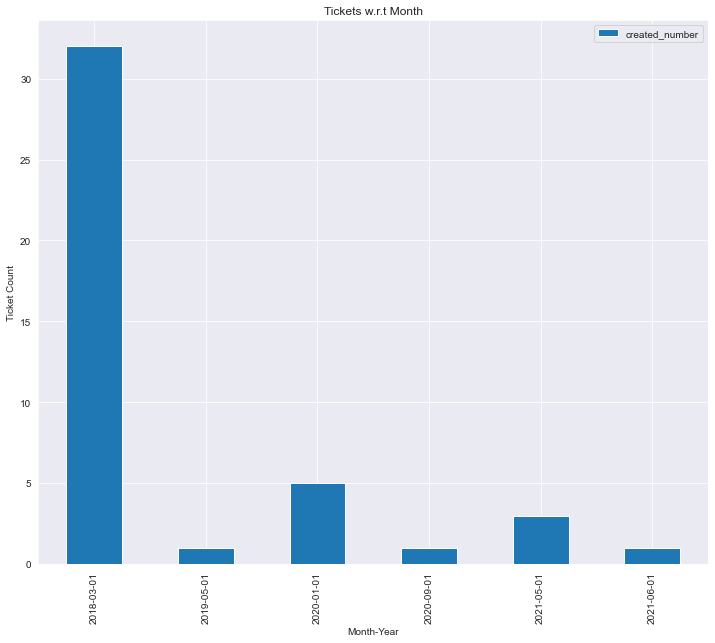

Prod10


<Figure size 2000x2000 with 0 Axes>

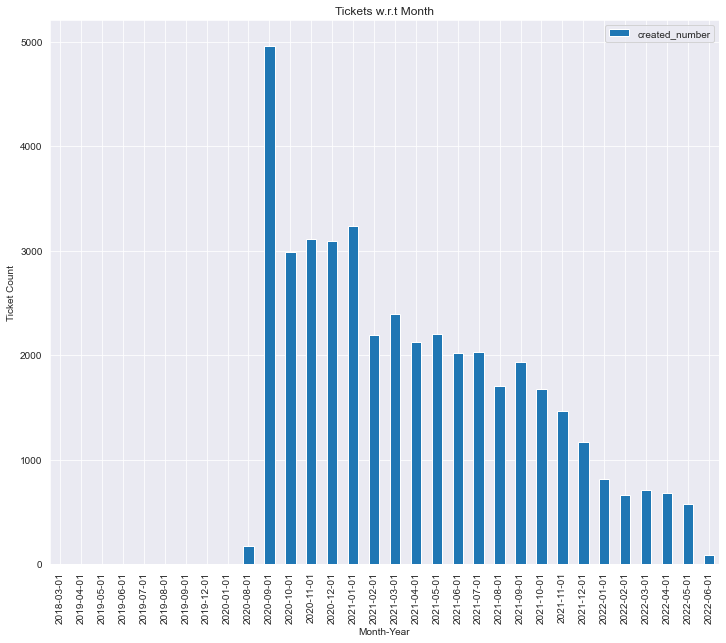

Prod11


<Figure size 2000x2000 with 0 Axes>

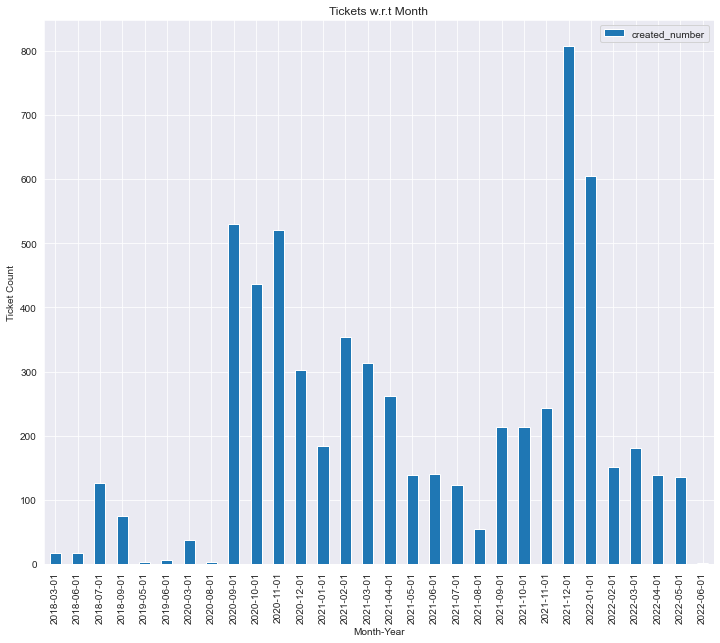

Prod12


<Figure size 2000x2000 with 0 Axes>

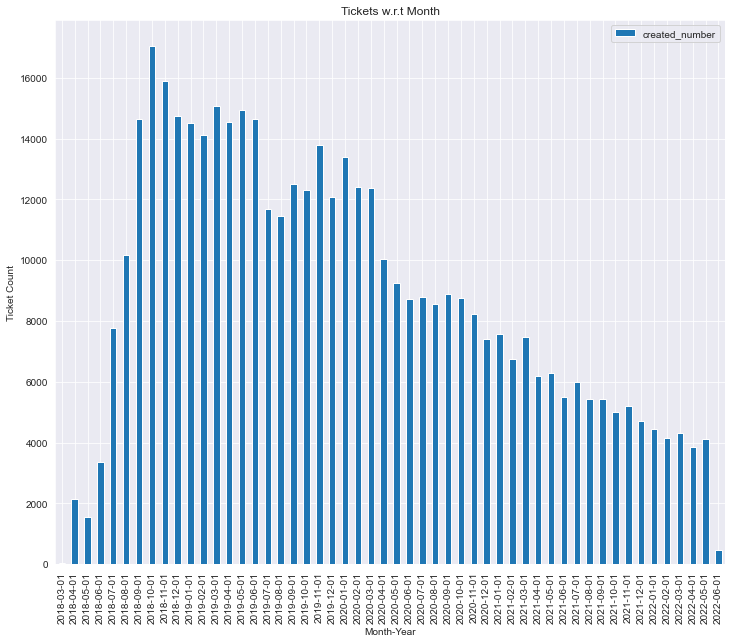

Prod13


<Figure size 2000x2000 with 0 Axes>

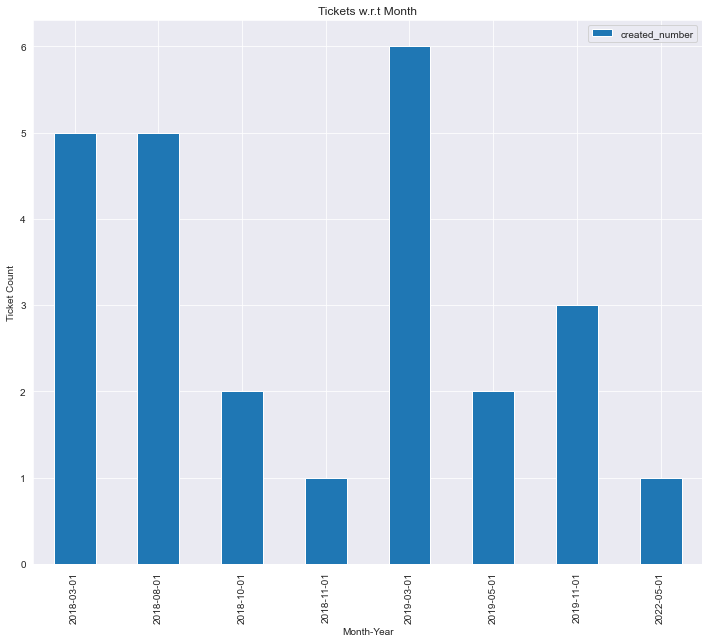

Prod2


<Figure size 2000x2000 with 0 Axes>

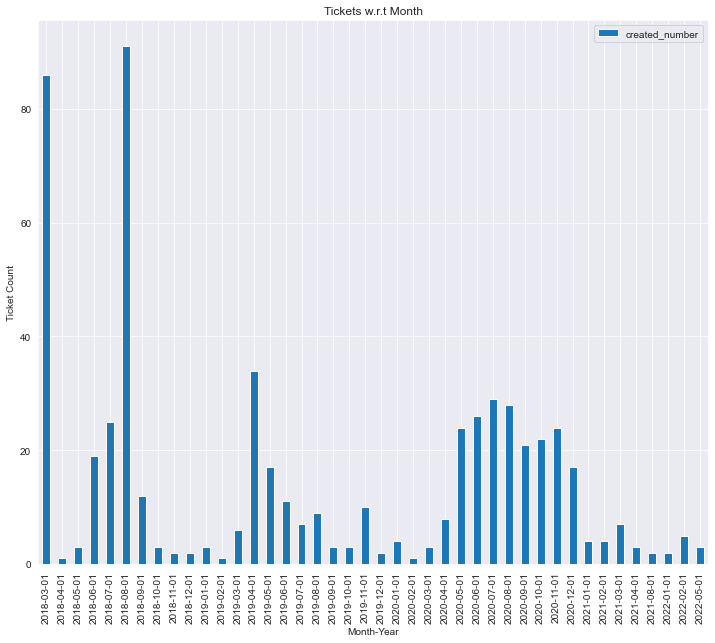

Prod3


<Figure size 2000x2000 with 0 Axes>

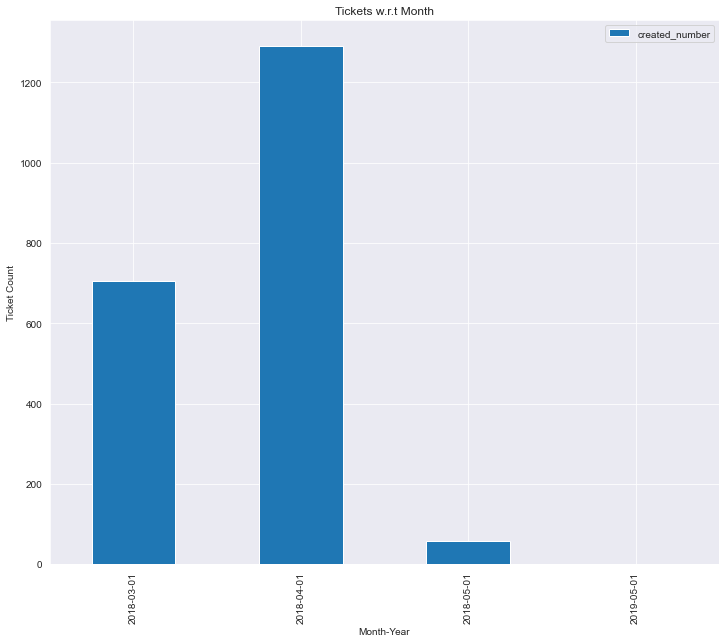

Prod4


<Figure size 2000x2000 with 0 Axes>

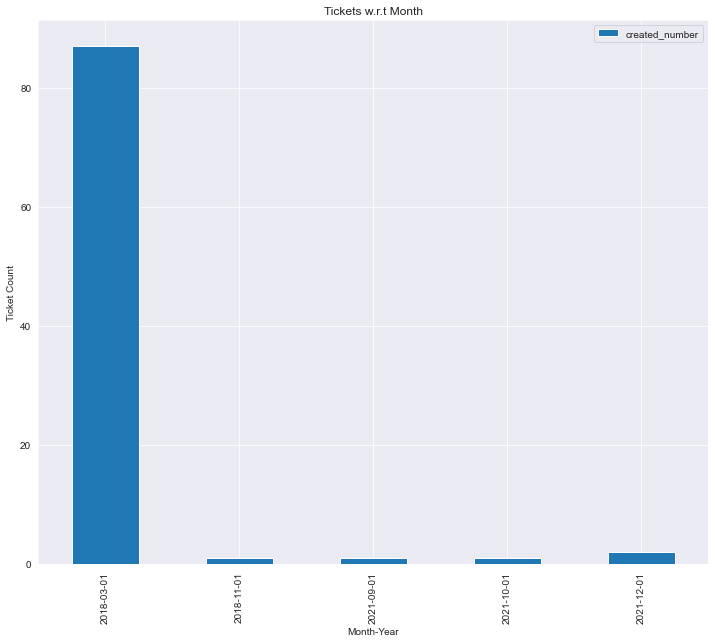

Prod5


<Figure size 2000x2000 with 0 Axes>

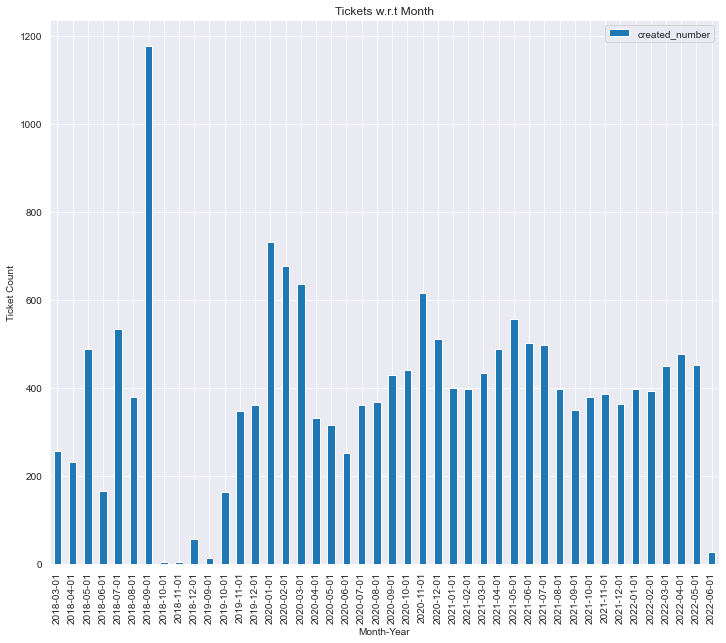

Prod7


<Figure size 2000x2000 with 0 Axes>

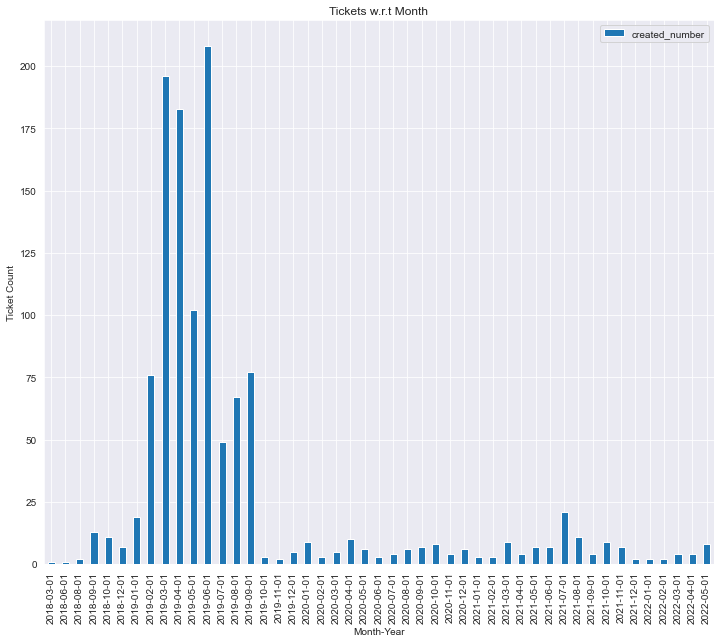

Prod14


<Figure size 2000x2000 with 0 Axes>

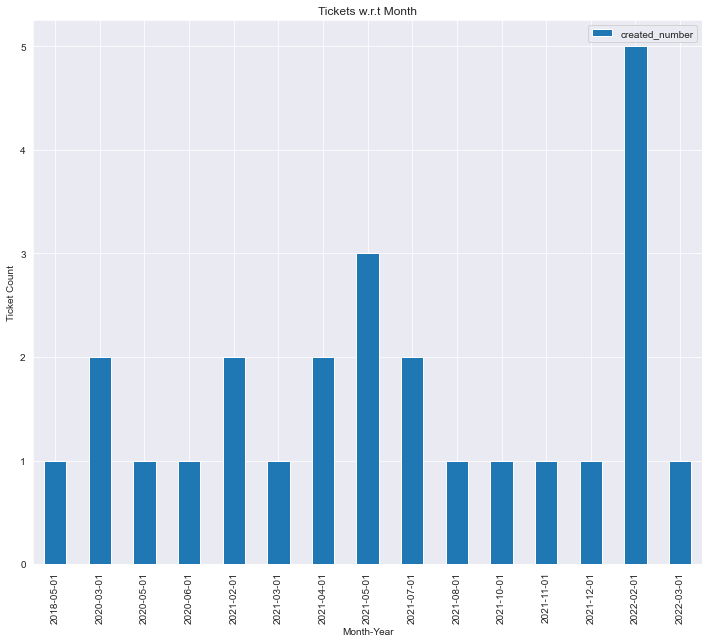

Prod8


<Figure size 2000x2000 with 0 Axes>

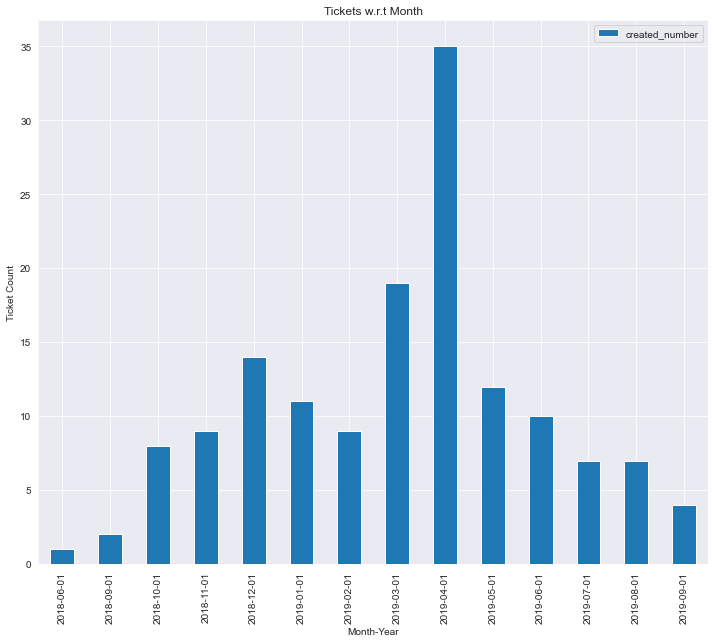

Prod9


<Figure size 2000x2000 with 0 Axes>

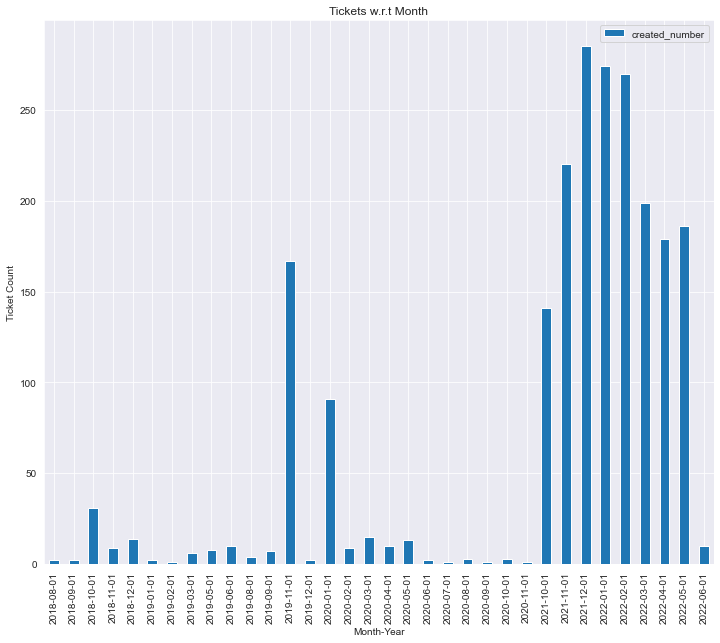

In [53]:
print("P5 Incident Tickets w.r.t each product -")
print("")
for i in df_count_P5['product'].unique():
    print(i)
    bar_plot(df_count_P5[df_count_P5['product'] == i],x="created_mmm_yy",y="created_number",title="Tickets w.r.t Month",xlabel="Month-Year",ylabel="Ticket Count")


In [54]:
# Taking a copy of original dataframe

df_copy = df.copy()
df_copy

created_mmm_yy created_quarter_year shift priority assigned_to  \
0           2018-08-01                Q3-18    S1       P0       AT 65   
1           2018-08-01                Q3-18    S1       P0       AT 65   
2           2018-08-01                Q3-18    S1       P0       AT 65   
3           2018-08-01                Q3-18    S1       P0       AT 65   
4           2018-08-01                Q3-18    S2       P0     AT 1790   
...                ...                  ...   ...      ...         ...   
2060087     2022-06-01                Q2-22    S3       P5     AT 2733   
2060088     2022-06-01                Q2-22    S3       P5     AT 2733   
2060089     2022-06-01                Q2-22    S3       P5     AT 2733   
2060090     2022-06-01                Q2-22    S3       P5     AT 2733   
2060091     2022-06-01                Q2-22    S3       P5     AT 2733   

        closed_mmm_yy closed_quarter_year product  created_number  \
0          2018-09-01               Q3-18   Prod8               1   
1          2018-09-01               Q3-18   Prod8               1   
2          2018-09-01               Q3-18   Prod8               1   
3          2018-09-01               Q3-18   Prod8               1   
4          2018-09-01               Q3-18   Prod4               1   
...               ...                 ...     ...             ...   
2060087    2022-06-01               Q2-22  Prod12               1   
2060088    2022-06-01               Q2-22  Prod12               1   
2060089    2022-06-01               Q2-22  Prod12               1   
2060090    2022-06-01               Q2-22  Prod12               1   
2060091    2022-06-01               Q2-22  Prod12               1   

         closed_number  open_tickets  
0                    1             0  
1                    1             0  
2                    1             0  
3                    1             0  
4                    1             0  
...                ...           ...  
2060087              1             0  
2060088              1             0  
2060089              1             0  
2060090              1             0  
2060091              1             0  

[2060092 rows x 11 columns]

### Checking the data types

In [55]:
df_copy.dtypes

created_mmm_yy          object
created_quarter_year    object
shift                   object
priority                object
assigned_to             object
closed_mmm_yy           object
closed_quarter_year     object
product                 object
created_number           int64
closed_number            int64
open_tickets             int64
dtype: object

### Converting date columns to datetime

In [56]:
df_copy[['created_mmm_yy','closed_mmm_yy']] = df_copy[['created_mmm_yy','closed_mmm_yy']].apply(pd.to_datetime)

In [57]:
df_copy.dtypes

created_mmm_yy          datetime64[ns]
created_quarter_year            object
shift                           object
priority                        object
assigned_to                     object
closed_mmm_yy           datetime64[ns]
closed_quarter_year             object
product                         object
created_number                   int64
closed_number                    int64
open_tickets                     int64
dtype: object

In [58]:
df_copy['created_mmm_yy'] = df_copy['created_mmm_yy'].dt.strftime('%Y-%m')
df_copy['closed_mmm_yy'] = df_copy['closed_mmm_yy'].dt.strftime('%Y-%m')
df_copy = df_copy.reset_index()
df_copy

index created_mmm_yy created_quarter_year shift priority  \
0              0        2018-08                Q3-18    S1       P0   
1              1        2018-08                Q3-18    S1       P0   
2              2        2018-08                Q3-18    S1       P0   
3              3        2018-08                Q3-18    S1       P0   
4              4        2018-08                Q3-18    S2       P0   
...          ...            ...                  ...   ...      ...   
2060087  2060087        2022-06                Q2-22    S3       P5   
2060088  2060088        2022-06                Q2-22    S3       P5   
2060089  2060089        2022-06                Q2-22    S3       P5   
2060090  2060090        2022-06                Q2-22    S3       P5   
2060091  2060091        2022-06                Q2-22    S3       P5   

        assigned_to closed_mmm_yy closed_quarter_year product  created_number  \
0             AT 65       2018-09               Q3-18   Prod8               1   
1             AT 65       2018-09               Q3-18   Prod8               1   
2             AT 65       2018-09               Q3-18   Prod8               1   
3             AT 65       2018-09               Q3-18   Prod8               1   
4           AT 1790       2018-09               Q3-18   Prod4               1   
...             ...           ...                 ...     ...             ...   
2060087     AT 2733       2022-06               Q2-22  Prod12               1   
2060088     AT 2733       2022-06               Q2-22  Prod12               1   
2060089     AT 2733       2022-06               Q2-22  Prod12               1   
2060090     AT 2733       2022-06               Q2-22  Prod12               1   
2060091     AT 2733       2022-06               Q2-22  Prod12               1   

         closed_number  open_tickets  
0                    1             0  
1                    1             0  
2                    1             0  
3                    1             0  
4                    1             0  
...                ...           ...  
2060087              1             0  
2060088              1             0  
2060089              1             0  
2060090              1             0  
2060091              1             0  

[2060092 rows x 12 columns]

### Creating a dataframe w.r.t created dates

In [59]:
df_create = df_copy.groupby(['created_mmm_yy','product','shift','priority']).agg({'index':'count','assigned_to':pd.Series.nunique}).reset_index()
df_create.rename(columns = {'created_mmm_yy':'date'}, inplace = True)
df_create

date product shift priority  index  assigned_to
0      2016-01   Prod1    S1       P2     28           12
1      2016-01   Prod1    S1       P3    119           22
2      2016-01   Prod1    S1       P4     43           18
3      2016-01   Prod1    S2       P2     23           14
4      2016-01   Prod1    S2       P3     68           24
...        ...     ...   ...      ...    ...          ...
11794  2022-06   Prod9    S1       P4      1            1
11795  2022-06   Prod9    S1       P5      5            1
11796  2022-06   Prod9    S2       P5      3            1
11797  2022-06   Prod9    S3       P3      1            1
11798  2022-06   Prod9    S3       P5      2            1

[11799 rows x 6 columns]

### Creating a dataframe w.r.t closed dates

In [60]:
df_close = df_copy.groupby(['closed_mmm_yy','product','shift','priority']).agg({'index':'count'}).reset_index()
df_close.rename(columns = {'closed_mmm_yy':'date'}, inplace = True)
df_close

date product shift priority  index
0      2016-01   Prod1    S1       P2     26
1      2016-01   Prod1    S1       P3    113
2      2016-01   Prod1    S1       P4     33
3      2016-01   Prod1    S2       P2     17
4      2016-01   Prod1    S2       P3     62
...        ...     ...   ...      ...    ...
11831  2022-06   Prod9    S2       P3      3
11832  2022-06   Prod9    S2       P4      5
11833  2022-06   Prod9    S2       P5      8
11834  2022-06   Prod9    S3       P3      1
11835  2022-06   Prod9    S3       P5      8

[11836 rows x 5 columns]

### Merging two dataframes

In [61]:
df_final = pd.merge(df_create, df_close, on = ['date','product','shift','priority'], how = 'outer')
df_final.rename(columns = {'index_x':'created_count','index_y':'closed_count'}, inplace = True)
df_final

date product shift priority  created_count  assigned_to  \
0      2016-01   Prod1    S1       P2           28.0         12.0   
1      2016-01   Prod1    S1       P3          119.0         22.0   
2      2016-01   Prod1    S1       P4           43.0         18.0   
3      2016-01   Prod1    S2       P2           23.0         14.0   
4      2016-01   Prod1    S2       P3           68.0         24.0   
...        ...     ...   ...      ...            ...          ...   
12095  2022-06   Prod8    S2       P3            NaN          NaN   
12096  2022-06   Prod9    S1       P2            NaN          NaN   
12097  2022-06   Prod9    S1       P3            NaN          NaN   
12098  2022-06   Prod9    S2       P3            NaN          NaN   
12099  2022-06   Prod9    S2       P4            NaN          NaN   

       closed_count  
0              26.0  
1             113.0  
2              33.0  
3              17.0  
4              62.0  
...             ...  
12095           4.0  
12096           1.0  
12097           1.0  
12098           3.0  
12099           5.0  

[12100 rows x 7 columns]

### Checking for Null Values

In [62]:
df_final.isnull().sum()

date               0
product            0
shift              0
priority           0
created_count    301
assigned_to      301
closed_count     264
dtype: int64

Replacing the null values present in created_count and assigned_to with 0 as there were no tickets created for the respective combination of Date, Product, Shift and Priority

Null values of closed_count are also replaced with 0 as there were no tickets closed for the respective combination of Date, Product, Shift and Priority

In [63]:
df_final['created_count'] = df_final['created_count'].fillna(0)
df_final['closed_count'] = df_final['closed_count'].fillna(0)
df_final['assigned_to'] = df_final['assigned_to'].fillna(0)
df_final

date product shift priority  created_count  assigned_to  \
0      2016-01   Prod1    S1       P2           28.0         12.0   
1      2016-01   Prod1    S1       P3          119.0         22.0   
2      2016-01   Prod1    S1       P4           43.0         18.0   
3      2016-01   Prod1    S2       P2           23.0         14.0   
4      2016-01   Prod1    S2       P3           68.0         24.0   
...        ...     ...   ...      ...            ...          ...   
12095  2022-06   Prod8    S2       P3            0.0          0.0   
12096  2022-06   Prod9    S1       P2            0.0          0.0   
12097  2022-06   Prod9    S1       P3            0.0          0.0   
12098  2022-06   Prod9    S2       P3            0.0          0.0   
12099  2022-06   Prod9    S2       P4            0.0          0.0   

       closed_count  
0              26.0  
1             113.0  
2              33.0  
3              17.0  
4              62.0  
...             ...  
12095           4.0  
12096           1.0  
12097           1.0  
12098           3.0  
12099           5.0  

[12100 rows x 7 columns]

## Modelling

Creating a dataframe based on the last 1 year data 


From : June 2021 to June 2022

In [64]:
df_2021 = df_final[df_final['date'] >= '2021-06']
df_2021

date product shift priority  created_count  assigned_to  \
9874   2021-06   Prod1    S1       P2           35.0         13.0   
9875   2021-06   Prod1    S1       P3           74.0         18.0   
9876   2021-06   Prod1    S1       P4           10.0          5.0   
9877   2021-06   Prod1    S2       P1            1.0          1.0   
9878   2021-06   Prod1    S2       P2           26.0         15.0   
...        ...     ...   ...      ...            ...          ...   
12095  2022-06   Prod8    S2       P3            0.0          0.0   
12096  2022-06   Prod9    S1       P2            0.0          0.0   
12097  2022-06   Prod9    S1       P3            0.0          0.0   
12098  2022-06   Prod9    S2       P3            0.0          0.0   
12099  2022-06   Prod9    S2       P4            0.0          0.0   

       closed_count  
9874           32.0  
9875           67.0  
9876           12.0  
9877            1.0  
9878           23.0  
...             ...  
12095           4.0  
12096           1.0  
12097           1.0  
12098           3.0  
12099           5.0  

[1978 rows x 7 columns]

### Pair Plots

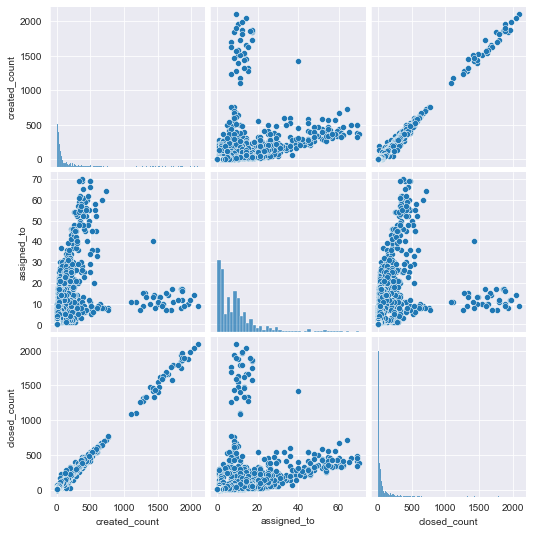

In [65]:
sns.pairplot(df_2021)

### Line Plots

<AxesSubplot:xlabel='date', ylabel='created_count'>

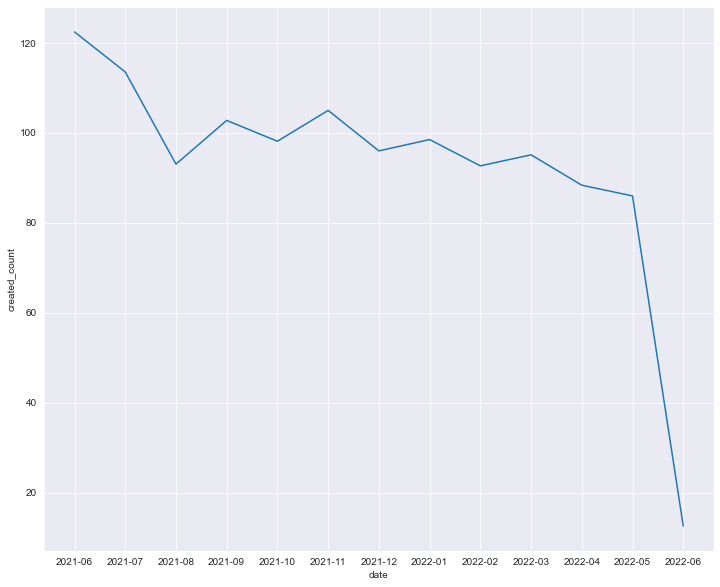

In [66]:
sns.lineplot(x='date',y='created_count', data = df_2021, ci=None)

<AxesSubplot:xlabel='date', ylabel='closed_count'>

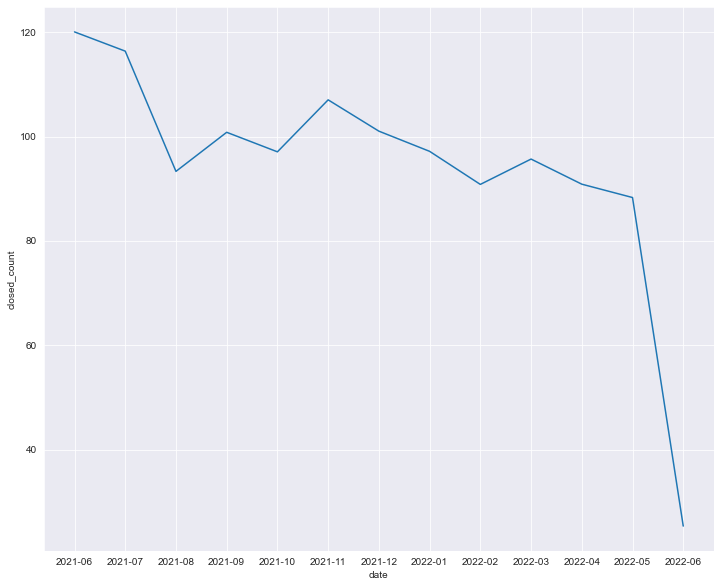

In [67]:
sns.lineplot(x='date',y='closed_count', data = df_2021, ci=None)

<AxesSubplot:xlabel='date', ylabel='assigned_to'>

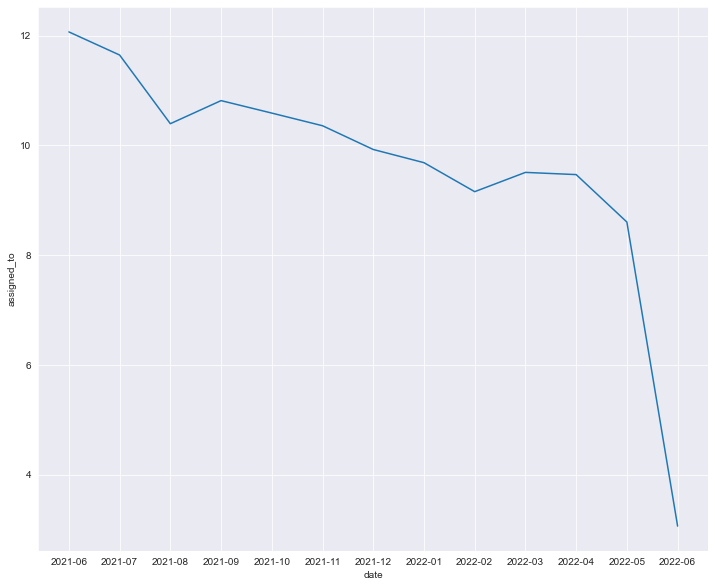

In [68]:
sns.lineplot(x='date',y='assigned_to', data = df_2021, ci=None)

### Heatmap

In [69]:
corr = df_2021.corr()
corr

created_count  assigned_to  closed_count
created_count       1.000000     0.323006      0.997321
assigned_to         0.323006     1.000000      0.319557
closed_count        0.997321     0.319557      1.000000

<AxesSubplot:>

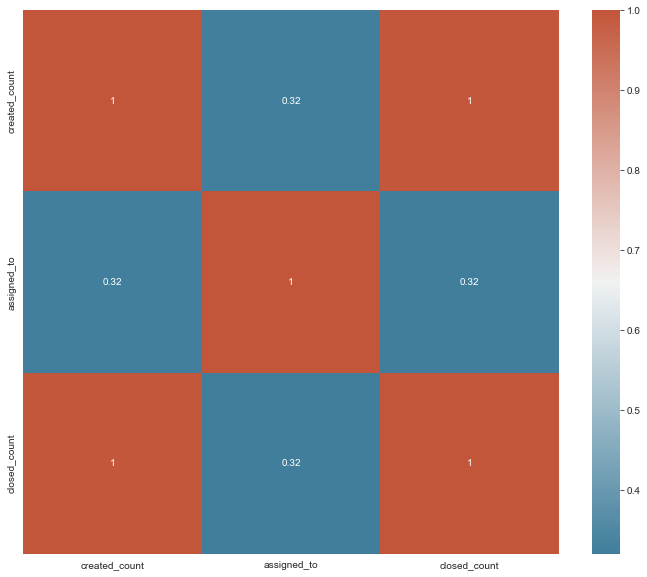

In [70]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap = cmap)

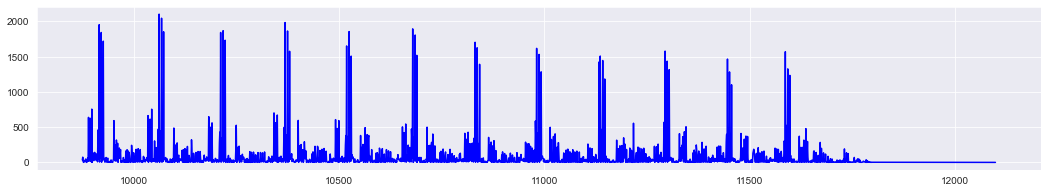

In [71]:
plt.figure(figsize=(18,3))
plt.plot(df_2021['created_count'], color='blue', label='Created Count')

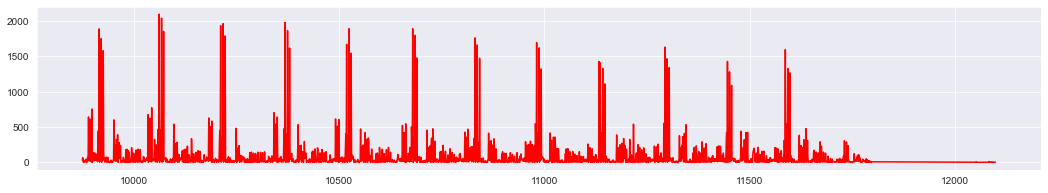

In [72]:
plt.figure(figsize=(18,3))
plt.plot(df_2021['closed_count'], color='red', label='Closed Count')

# Linear Regression

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [74]:
Y = df_2021['created_count']
X = df_2021.drop(['created_count'], axis = 1)
Y = pd.DataFrame(Y)
Y

created_count
9874            35.0
9875            74.0
9876            10.0
9877             1.0
9878            26.0
...              ...
12095            0.0
12096            0.0
12097            0.0
12098            0.0
12099            0.0

[1978 rows x 1 columns]

## One-hot encoding

In [75]:
X.loc[ X["shift"] == "S1", "shift"] = "1"
X.loc[ X["shift"] == "S2", "shift"] = "2"
X.loc[ X["shift"] == "S3", "shift"] = "3"
X

date product shift priority  assigned_to  closed_count
9874   2021-06   Prod1     1       P2         13.0          32.0
9875   2021-06   Prod1     1       P3         18.0          67.0
9876   2021-06   Prod1     1       P4          5.0          12.0
9877   2021-06   Prod1     2       P1          1.0           1.0
9878   2021-06   Prod1     2       P2         15.0          23.0
...        ...     ...   ...      ...          ...           ...
12095  2022-06   Prod8     2       P3          0.0           4.0
12096  2022-06   Prod9     1       P2          0.0           1.0
12097  2022-06   Prod9     1       P3          0.0           1.0
12098  2022-06   Prod9     2       P3          0.0           3.0
12099  2022-06   Prod9     2       P4          0.0           5.0

[1978 rows x 6 columns]

In [76]:
X.loc[ X["priority"] == "P0", "priority"] = "0"
X.loc[ X["priority"] == "P1", "priority"] = "1"
X.loc[ X["priority"] == "P2", "priority"] = "2"
X.loc[ X["priority"] == "P3", "priority"] = "3"
X.loc[ X["priority"] == "P4", "priority"] = "4"
X.loc[ X["priority"] == "P5", "priority"] = "5"
X

date product shift priority  assigned_to  closed_count
9874   2021-06   Prod1     1        2         13.0          32.0
9875   2021-06   Prod1     1        3         18.0          67.0
9876   2021-06   Prod1     1        4          5.0          12.0
9877   2021-06   Prod1     2        1          1.0           1.0
9878   2021-06   Prod1     2        2         15.0          23.0
...        ...     ...   ...      ...          ...           ...
12095  2022-06   Prod8     2        3          0.0           4.0
12096  2022-06   Prod9     1        2          0.0           1.0
12097  2022-06   Prod9     1        3          0.0           1.0
12098  2022-06   Prod9     2        3          0.0           3.0
12099  2022-06   Prod9     2        4          0.0           5.0

[1978 rows x 6 columns]

In [77]:
X.loc[ X["product"] == "Prod1", "product"]  = "1"
X.loc[ X["product"] == "Prod2", "product"]  = "2"
X.loc[ X["product"] == "Prod3", "product"]  = "3"
X.loc[ X["product"] == "Prod4", "product"]  = "4"
X.loc[ X["product"] == "Prod5", "product"]  = "5"
X.loc[ X["product"] == "Prod6", "product"]  = "6"
X.loc[ X["product"] == "Prod7", "product"]  = "7"
X.loc[ X["product"] == "Prod8", "product"]  = "8"
X.loc[ X["product"] == "Prod9", "product"]  = "9"
X.loc[ X["product"] == "Prod10", "product"] = "10"
X.loc[ X["product"] == "Prod11", "product"] = "11"
X.loc[ X["product"] == "Prod12", "product"] = "12"
X.loc[ X["product"] == "Prod13", "product"] = "13"
X.loc[ X["product"] == "Prod14", "product"] = "14"
X.loc[ X["product"] == "Prod15", "product"] = "15"
X

date product shift priority  assigned_to  closed_count
9874   2021-06       1     1        2         13.0          32.0
9875   2021-06       1     1        3         18.0          67.0
9876   2021-06       1     1        4          5.0          12.0
9877   2021-06       1     2        1          1.0           1.0
9878   2021-06       1     2        2         15.0          23.0
...        ...     ...   ...      ...          ...           ...
12095  2022-06       8     2        3          0.0           4.0
12096  2022-06       9     1        2          0.0           1.0
12097  2022-06       9     1        3          0.0           1.0
12098  2022-06       9     2        3          0.0           3.0
12099  2022-06       9     2        4          0.0           5.0

[1978 rows x 6 columns]

In [78]:
X_t = X.copy()
X_t

date product shift priority  assigned_to  closed_count
9874   2021-06       1     1        2         13.0          32.0
9875   2021-06       1     1        3         18.0          67.0
9876   2021-06       1     1        4          5.0          12.0
9877   2021-06       1     2        1          1.0           1.0
9878   2021-06       1     2        2         15.0          23.0
...        ...     ...   ...      ...          ...           ...
12095  2022-06       8     2        3          0.0           4.0
12096  2022-06       9     1        2          0.0           1.0
12097  2022-06       9     1        3          0.0           1.0
12098  2022-06       9     2        3          0.0           3.0
12099  2022-06       9     2        4          0.0           5.0

[1978 rows x 6 columns]

### Splitting X and Y into training and testing sets

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t, Y, test_size=0.2,random_state=0)

In [80]:
col = ['product','shift','priority','assigned_to','closed_count']
col

['product', 'shift', 'priority', 'assigned_to', 'closed_count']

#### Creating linear regression object

In [81]:
reg = linear_model.LinearRegression()

#### Model training using the training set

In [82]:
reg.fit(X_train[col], y_train)

LinearRegression()

#### Computing Regression coefficients

In [83]:
print('Coefficients: ', reg.coef_)

print("Intercept: ",reg.intercept_)

print('Variance score: {}'.format(reg.score(X_test[col], y_test)))

Coefficients:  [[ 0.03122568  0.22617826 -0.36036769  0.10564252  0.99138002]]
Intercept:  [-1.20720076]
Variance score: 0.9970371092377728


### Computing R2

In [84]:
r_sq = reg.score(X_train[col], y_train)
r_sq

0.9941834302012978

In [85]:
print(f"intercept: {reg.intercept_}")

print(f"slope: {reg.coef_}")

intercept: [-1.20720076]
slope: [[ 0.03122568  0.22617826 -0.36036769  0.10564252  0.99138002]]


#### Predicting the target variable using test dataset

In [86]:
y_pred = reg.predict(X_test[col])
y_pred

array([[ 4.69891530e+01],
       [ 2.94067392e-01],
       [ 1.30789589e+01],
       [ 9.56744084e+01],
       [ 1.20944606e+01],
       [ 1.67305652e+02],
       [ 3.57049076e+00],
       [ 9.91145587e+01],
       [ 2.73535775e+01],
       [ 1.09915826e+01],
       [ 1.99907788e+02],
       [ 5.04939424e-01],
       [ 5.40952566e+00],
       [ 4.86514464e+00],
       [ 2.98987131e-01],
       [ 1.03457620e+01],
       [ 3.47158077e+01],
       [ 1.71826224e+01],
       [ 3.80675384e+02],
       [ 2.63653314e+00],
       [ 7.34010505e+01],
       [ 2.40902753e-01],
       [ 4.30714560e+00],
       [ 3.72125248e+01],
       [-4.04729036e-01],
       [ 5.04787743e+01],
       [-6.84071933e-01],
       [ 7.45800427e+00],
       [ 1.64509349e+03],
       [ 1.10165056e+02],
       [ 3.18134058e+01],
       [ 2.84780673e-01],
       [ 9.32093906e+01],
       [ 9.35905275e+00],
       [ 2.48089494e+01],
       [ 7.01454906e+01],
       [ 2.14143352e+01],
       [-5.63536196e-01],
       [ 6.4

#### Creating a dataframe for predicted values

In [87]:
sample1 = y_pred.reshape(-1,1).flatten()
sample1 = pd.DataFrame(sample1)
sample1[0] = sample1[0].round()
sample1.rename(columns={0:'predicted_create_count'}, inplace = True)
sample1

predicted_create_count
0                      47.0
1                       0.0
2                      13.0
3                      96.0
4                      12.0
..                      ...
391                    66.0
392                    37.0
393                     1.0
394                   506.0
395                     6.0

[396 rows x 1 columns]

#### Creating a dataframe for actual ticket count

In [88]:
sample = y_test.values.reshape(-1,1).flatten()
sample = pd.DataFrame(sample)
sample.rename(columns={0:'actual_create_count'}, inplace = True)
sample

actual_create_count
0                   44.0
1                    1.0
2                   15.0
3                   54.0
4                   10.0
..                   ...
391                 76.0
392                 37.0
393                  2.0
394                481.0
395                  0.0

[396 rows x 1 columns]

In [89]:
sample['predicted_create_count'] = sample1
sample = sample.reset_index()
sample

index  actual_create_count  predicted_create_count
0        0                 44.0                    47.0
1        1                  1.0                     0.0
2        2                 15.0                    13.0
3        3                 54.0                    96.0
4        4                 10.0                    12.0
..     ...                  ...                     ...
391    391                 76.0                    66.0
392    392                 37.0                    37.0
393    393                  2.0                     1.0
394    394                481.0                   506.0
395    395                  0.0                     6.0

[396 rows x 3 columns]

In [90]:
X_test.reset_index(inplace = True)
X_test.drop(['index'], inplace = True, axis = 1)

In [91]:
X_test.reset_index(inplace = True)
X_test

index     date product shift priority  assigned_to  closed_count
0        0  2021-07      14     2        4         11.0          48.0
1        1  2021-07      10     2        1          1.0           1.0
2        2  2021-06       8     2        1         10.0          13.0
3        3  2021-08       3     1        3         14.0          97.0
4        4  2021-10      14     3        4          7.0          13.0
..     ...      ...     ...   ...      ...          ...           ...
391    391  2021-11      11     1        5          1.0          69.0
392    392  2021-08      11     1        3         10.0          38.0
393    393  2022-06       4     2        3          2.0           3.0
394    394  2021-10      10     2        5          7.0         512.0
395    395  2022-06       4     2        4          0.0           8.0

[396 rows x 7 columns]

### Merging predicted dataframe with Test Dataset

In [92]:
output = pd.merge(sample,X_test,on='index',how='outer')
output

index  actual_create_count  predicted_create_count     date product  \
0        0                 44.0                    47.0  2021-07      14   
1        1                  1.0                     0.0  2021-07      10   
2        2                 15.0                    13.0  2021-06       8   
3        3                 54.0                    96.0  2021-08       3   
4        4                 10.0                    12.0  2021-10      14   
..     ...                  ...                     ...      ...     ...   
391    391                 76.0                    66.0  2021-11      11   
392    392                 37.0                    37.0  2021-08      11   
393    393                  2.0                     1.0  2022-06       4   
394    394                481.0                   506.0  2021-10      10   
395    395                  0.0                     6.0  2022-06       4   

    shift priority  assigned_to  closed_count  
0       2        4         11.0          48.0  
1       2        1          1.0           1.0  
2       2        1         10.0          13.0  
3       1        3         14.0          97.0  
4       3        4          7.0          13.0  
..    ...      ...          ...           ...  
391     1        5          1.0          69.0  
392     1        3         10.0          38.0  
393     2        3          2.0           3.0  
394     2        5          7.0         512.0  
395     2        4          0.0           8.0  

[396 rows x 9 columns]

In [93]:
column_names = ['index','date','product','shift','priority','assigned_to','closed_count','actual_create_count','predicted_create_count']

output = output.reindex(columns=column_names)
output

index     date product shift priority  assigned_to  closed_count  \
0        0  2021-07      14     2        4         11.0          48.0   
1        1  2021-07      10     2        1          1.0           1.0   
2        2  2021-06       8     2        1         10.0          13.0   
3        3  2021-08       3     1        3         14.0          97.0   
4        4  2021-10      14     3        4          7.0          13.0   
..     ...      ...     ...   ...      ...          ...           ...   
391    391  2021-11      11     1        5          1.0          69.0   
392    392  2021-08      11     1        3         10.0          38.0   
393    393  2022-06       4     2        3          2.0           3.0   
394    394  2021-10      10     2        5          7.0         512.0   
395    395  2022-06       4     2        4          0.0           8.0   

     actual_create_count  predicted_create_count  
0                   44.0                    47.0  
1                    1.0                     0.0  
2                   15.0                    13.0  
3                   54.0                    96.0  
4                   10.0                    12.0  
..                   ...                     ...  
391                 76.0                    66.0  
392                 37.0                    37.0  
393                  2.0                     1.0  
394                481.0                   506.0  
395                  0.0                     6.0  

[396 rows x 9 columns]

# Resource Prediction

In [94]:
B = df_2021['assigned_to']
A = df_2021.drop(['assigned_to'], axis = 1)
B = pd.DataFrame(B)
B

assigned_to
9874          13.0
9875          18.0
9876           5.0
9877           1.0
9878          15.0
...            ...
12095          0.0
12096          0.0
12097          0.0
12098          0.0
12099          0.0

[1978 rows x 1 columns]

## One-hot encoding

In [95]:
A.loc[ A["shift"] == "S1", "shift"] = "1"
A.loc[ A["shift"] == "S2", "shift"] = "2"
A.loc[ A["shift"] == "S3", "shift"] = "3"
A

date product shift priority  created_count  closed_count
9874   2021-06   Prod1     1       P2           35.0          32.0
9875   2021-06   Prod1     1       P3           74.0          67.0
9876   2021-06   Prod1     1       P4           10.0          12.0
9877   2021-06   Prod1     2       P1            1.0           1.0
9878   2021-06   Prod1     2       P2           26.0          23.0
...        ...     ...   ...      ...            ...           ...
12095  2022-06   Prod8     2       P3            0.0           4.0
12096  2022-06   Prod9     1       P2            0.0           1.0
12097  2022-06   Prod9     1       P3            0.0           1.0
12098  2022-06   Prod9     2       P3            0.0           3.0
12099  2022-06   Prod9     2       P4            0.0           5.0

[1978 rows x 6 columns]

In [96]:
A.loc[ A["priority"] == "P0", "priority"] = "0"
A.loc[ A["priority"] == "P1", "priority"] = "1"
A.loc[ A["priority"] == "P2", "priority"] = "2"
A.loc[ A["priority"] == "P3", "priority"] = "3"
A.loc[ A["priority"] == "P4", "priority"] = "4"
A.loc[ A["priority"] == "P5", "priority"] = "5"
A

date product shift priority  created_count  closed_count
9874   2021-06   Prod1     1        2           35.0          32.0
9875   2021-06   Prod1     1        3           74.0          67.0
9876   2021-06   Prod1     1        4           10.0          12.0
9877   2021-06   Prod1     2        1            1.0           1.0
9878   2021-06   Prod1     2        2           26.0          23.0
...        ...     ...   ...      ...            ...           ...
12095  2022-06   Prod8     2        3            0.0           4.0
12096  2022-06   Prod9     1        2            0.0           1.0
12097  2022-06   Prod9     1        3            0.0           1.0
12098  2022-06   Prod9     2        3            0.0           3.0
12099  2022-06   Prod9     2        4            0.0           5.0

[1978 rows x 6 columns]

In [97]:
A.loc[ A["product"] == "Prod1", "product"]  = "1"
A.loc[ A["product"] == "Prod2", "product"]  = "2"
A.loc[ A["product"] == "Prod3", "product"]  = "3"
A.loc[ A["product"] == "Prod4", "product"]  = "4"
A.loc[ A["product"] == "Prod5", "product"]  = "5"
A.loc[ A["product"] == "Prod6", "product"]  = "6"
A.loc[ A["product"] == "Prod7", "product"]  = "7"
A.loc[ A["product"] == "Prod8", "product"]  = "8"
A.loc[ A["product"] == "Prod9", "product"]  = "9"
A.loc[ A["product"] == "Prod10", "product"] = "10"
A.loc[ A["product"] == "Prod11", "product"] = "11"
A.loc[ A["product"] == "Prod12", "product"] = "12"
A.loc[ A["product"] == "Prod13", "product"] = "13"
A.loc[ A["product"] == "Prod14", "product"] = "14"
A.loc[ A["product"] == "Prod15", "product"] = "15"
A

date product shift priority  created_count  closed_count
9874   2021-06       1     1        2           35.0          32.0
9875   2021-06       1     1        3           74.0          67.0
9876   2021-06       1     1        4           10.0          12.0
9877   2021-06       1     2        1            1.0           1.0
9878   2021-06       1     2        2           26.0          23.0
...        ...     ...   ...      ...            ...           ...
12095  2022-06       8     2        3            0.0           4.0
12096  2022-06       9     1        2            0.0           1.0
12097  2022-06       9     1        3            0.0           1.0
12098  2022-06       9     2        3            0.0           3.0
12099  2022-06       9     2        4            0.0           5.0

[1978 rows x 6 columns]

### Splitting A and B into training and testing sets

In [98]:
from sklearn.model_selection import train_test_split

A_train, A_test, b_train, b_test = train_test_split(A, B, test_size=0.2,random_state=0)

In [99]:
col1 = ['product','shift','priority','created_count','closed_count']
col1

['product', 'shift', 'priority', 'created_count', 'closed_count']

#### Creating linear regression object

In [100]:
reg = linear_model.LinearRegression()

#### Training the model using the training dataset

In [101]:
reg.fit(A_train[col1], b_train)

LinearRegression()

In [102]:
y_pred = reg.predict(A_test[col1])
y_pred

array([[ 7.98502278],
       [ 9.25271953],
       [ 9.61155082],
       [ 8.53268516],
       [ 7.48109604],
       [10.64350177],
       [ 9.74009113],
       [10.42662473],
       [ 7.85822123],
       [ 8.03152993],
       [12.18282312],
       [ 7.68244369],
       [ 8.19363578],
       [ 9.20437891],
       [10.19063792],
       [ 7.66578204],
       [ 8.27382834],
       [ 8.3714937 ],
       [13.58219718],
       [ 7.81974495],
       [ 8.02907003],
       [10.12103143],
       [ 9.21001914],
       [ 8.72852099],
       [ 7.3470239 ],
       [ 7.92003139],
       [ 8.21815591],
       [ 7.86758807],
       [31.10779525],
       [ 9.9643726 ],
       [ 8.60858603],
       [ 8.49111529],
       [ 9.26832352],
       [ 8.32114785],
       [ 9.19543383],
       [ 8.92640015],
       [ 8.39791318],
       [ 8.18105474],
       [ 9.20953874],
       [14.0720299 ],
       [ 8.00342844],
       [ 9.5880117 ],
       [ 9.41948272],
       [ 8.57185472],
       [ 9.34856287],
       [ 9

#### Creating a dataframe for predicted resources

In [104]:
sample1 = y_pred.reshape(-1,1).flatten()
sample1 = pd.DataFrame(sample1)
sample1[0] = sample1[0].round()
sample1.rename(columns={0:'Predicted_resource'}, inplace = True)
sample1

Predicted_resource
0                   8.0
1                   9.0
2                  10.0
3                   9.0
4                   7.0
..                  ...
391                 8.0
392                 9.0
393                 8.0
394                14.0
395                 8.0

[396 rows x 1 columns]

#### Creating a dataframe for actual resources

In [105]:
sample = b_test.values.reshape(-1,1).flatten()
sample = pd.DataFrame(sample)
sample.rename(columns={0:'Actual_resource'}, inplace = True)
sample

Actual_resource
0               11.0
1                1.0
2               10.0
3               14.0
4                7.0
..               ...
391              1.0
392             10.0
393              2.0
394              7.0
395              0.0

[396 rows x 1 columns]

#### Merging predicted dataframe with test dataset

In [106]:
sample['Predicted_resource'] = sample1
sample

Actual_resource  Predicted_resource
0               11.0                 8.0
1                1.0                 9.0
2               10.0                10.0
3               14.0                 9.0
4                7.0                 7.0
..               ...                 ...
391              1.0                 8.0
392             10.0                 9.0
393              2.0                 8.0
394              7.0                14.0
395              0.0                 8.0

[396 rows x 2 columns]

## Mean Absolute Error

In [107]:
import sklearn

Replacing rows with value 0 to 1

In [108]:
b_test = np.where(b_test['assigned_to']<1, 1, b_test['assigned_to'])
b_test

array([11.,  1., 10., 14.,  7.,  7.,  2., 15., 14., 12.,  1.,  2.,  6.,
        4.,  1.,  5., 18., 10., 70.,  4.,  1.,  1.,  3., 14.,  1.,  2.,
        1.,  7., 15., 20., 18.,  1.,  2.,  8.,  4.,  8., 18.,  1., 12.,
        3.,  8.,  8., 12.,  8.,  9.,  1.,  6.,  1., 17.,  5.,  3.,  2.,
        6., 11.,  5., 11.,  1.,  9.,  3., 11., 61., 12.,  9., 14.,  1.,
        1.,  8.,  9.,  2.,  1., 19.,  8.,  2., 15.,  1., 13., 21., 15.,
        6., 17.,  3.,  1.,  1.,  3., 17., 20., 32.,  7., 16.,  2., 14.,
       28.,  5., 10., 11.,  7., 17.,  4.,  8.,  7., 25.,  1., 12.,  3.,
        1., 19.,  1.,  6.,  8., 36.,  1., 16.,  1.,  5.,  6.,  6.,  2.,
        8.,  2.,  2., 25.,  7.,  2.,  1.,  1.,  2., 17.,  8., 11.,  4.,
       11., 55., 34., 15.,  4., 11., 24., 17.,  7.,  2., 15.,  1.,  8.,
        1.,  7., 17.,  9.,  1.,  2., 17.,  9.,  5.,  2.,  4.,  2.,  1.,
        8., 12.,  2.,  9., 22.,  6.,  1.,  2.,  1.,  1.,  2., 13.,  9.,
        8., 60.,  2., 45.,  1.,  1., 16., 46.,  7., 10.,  7.,  1

In [109]:
y_pred_arr = np.array(y_pred)
y_pred_arr

array([[ 7.98502278],
       [ 9.25271953],
       [ 9.61155082],
       [ 8.53268516],
       [ 7.48109604],
       [10.64350177],
       [ 9.74009113],
       [10.42662473],
       [ 7.85822123],
       [ 8.03152993],
       [12.18282312],
       [ 7.68244369],
       [ 8.19363578],
       [ 9.20437891],
       [10.19063792],
       [ 7.66578204],
       [ 8.27382834],
       [ 8.3714937 ],
       [13.58219718],
       [ 7.81974495],
       [ 8.02907003],
       [10.12103143],
       [ 9.21001914],
       [ 8.72852099],
       [ 7.3470239 ],
       [ 7.92003139],
       [ 8.21815591],
       [ 7.86758807],
       [31.10779525],
       [ 9.9643726 ],
       [ 8.60858603],
       [ 8.49111529],
       [ 9.26832352],
       [ 8.32114785],
       [ 9.19543383],
       [ 8.92640015],
       [ 8.39791318],
       [ 8.18105474],
       [ 9.20953874],
       [14.0720299 ],
       [ 8.00342844],
       [ 9.5880117 ],
       [ 9.41948272],
       [ 8.57185472],
       [ 9.34856287],
       [ 9

In [110]:
b_test_arr = np.array(b_test)
b_test_arr

array([11.,  1., 10., 14.,  7.,  7.,  2., 15., 14., 12.,  1.,  2.,  6.,
        4.,  1.,  5., 18., 10., 70.,  4.,  1.,  1.,  3., 14.,  1.,  2.,
        1.,  7., 15., 20., 18.,  1.,  2.,  8.,  4.,  8., 18.,  1., 12.,
        3.,  8.,  8., 12.,  8.,  9.,  1.,  6.,  1., 17.,  5.,  3.,  2.,
        6., 11.,  5., 11.,  1.,  9.,  3., 11., 61., 12.,  9., 14.,  1.,
        1.,  8.,  9.,  2.,  1., 19.,  8.,  2., 15.,  1., 13., 21., 15.,
        6., 17.,  3.,  1.,  1.,  3., 17., 20., 32.,  7., 16.,  2., 14.,
       28.,  5., 10., 11.,  7., 17.,  4.,  8.,  7., 25.,  1., 12.,  3.,
        1., 19.,  1.,  6.,  8., 36.,  1., 16.,  1.,  5.,  6.,  6.,  2.,
        8.,  2.,  2., 25.,  7.,  2.,  1.,  1.,  2., 17.,  8., 11.,  4.,
       11., 55., 34., 15.,  4., 11., 24., 17.,  7.,  2., 15.,  1.,  8.,
        1.,  7., 17.,  9.,  1.,  2., 17.,  9.,  5.,  2.,  4.,  2.,  1.,
        8., 12.,  2.,  9., 22.,  6.,  1.,  2.,  1.,  1.,  2., 13.,  9.,
        8., 60.,  2., 45.,  1.,  1., 16., 46.,  7., 10.,  7.,  1

In [111]:
sklearn.metrics.mean_absolute_error(y_pred_arr, b_test_arr)

6.788701807250794